### 5.3 레버리지와 아웃라이어

In [1]:
from sklearn.datasets import make_regression

In [2]:
# 가상의 데이터 생성, 레버리지 높은 데이터 추가
x0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)
data_100 = (4, 300)
data_101 = (3, 150)

In [3]:
x0 = np.vstack([x0, np.array([data_100[:1], data_101[:1]])])
x = sm.add_constant(x0)
y = np.hstack([y, [data_100[1], data_101[1]]])

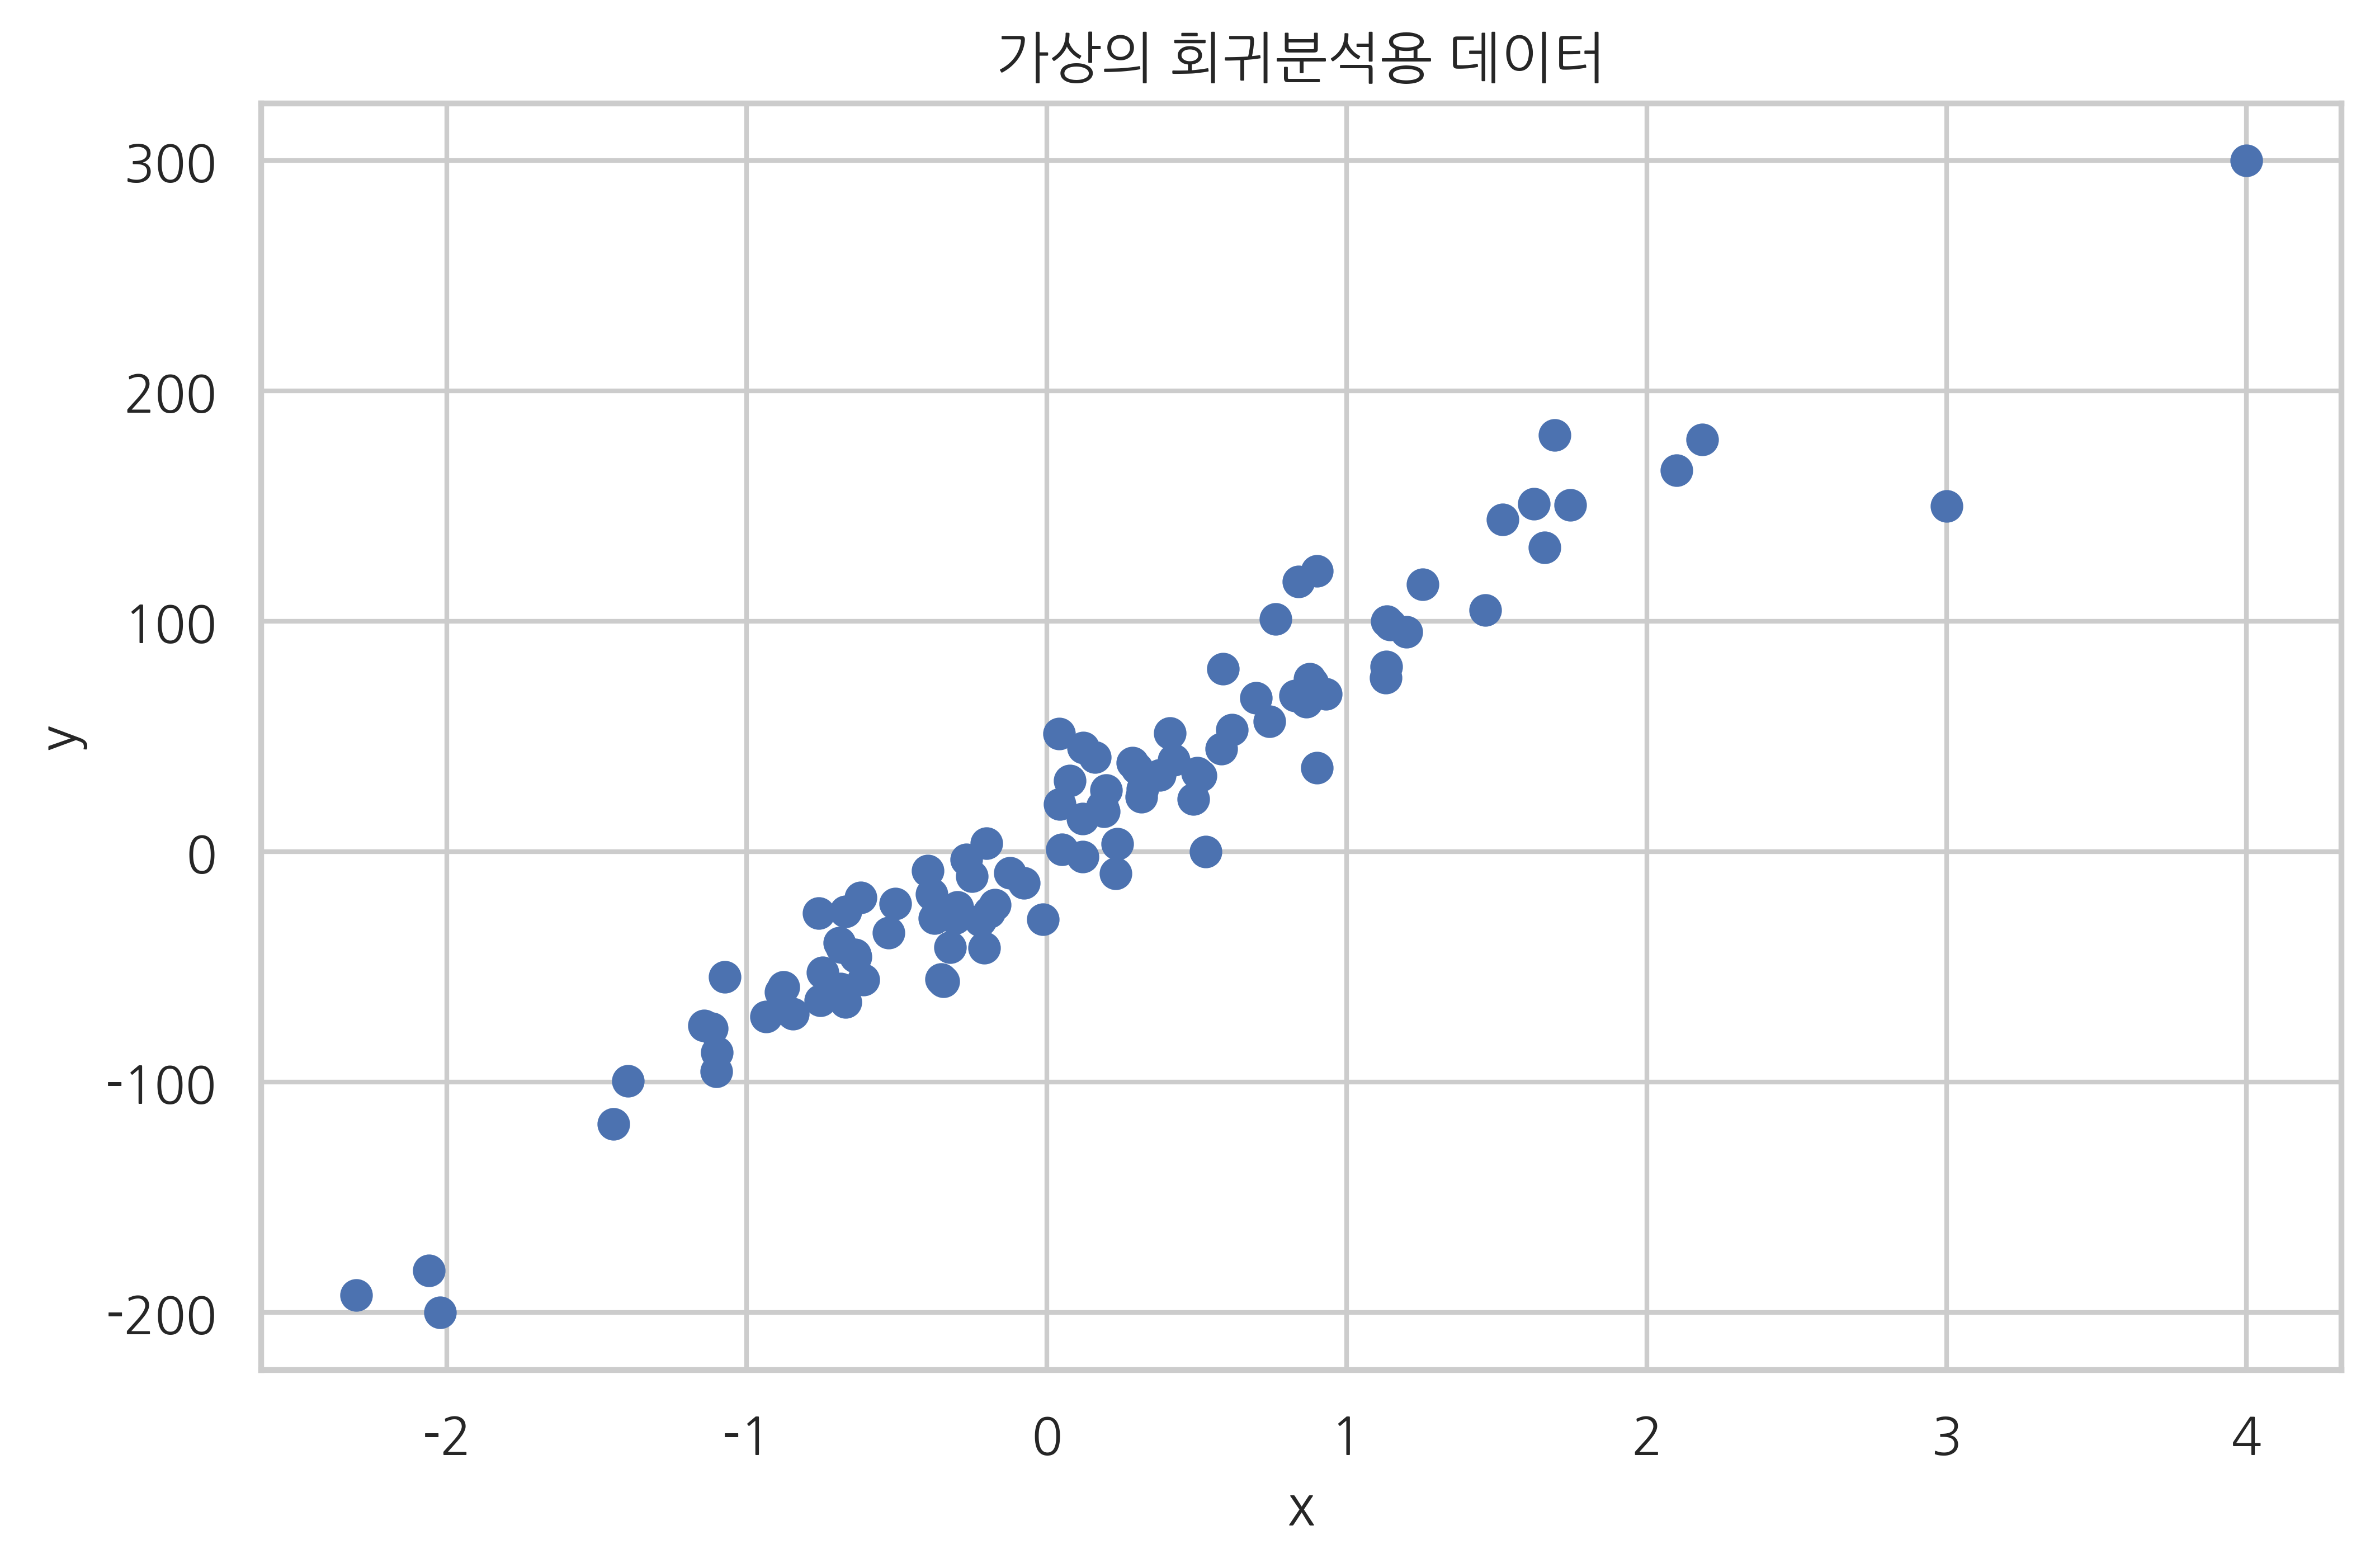

In [4]:
plt.scatter(x0, y)
plt.xlabel('x'); plt.ylabel('y')
plt.title('가상의 회귀분석용 데이터')
plt.show()

In [5]:
dfx = pd.DataFrame(x)
dfy = pd.DataFrame(y)
model = sm.OLS(dfy, dfx)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           1.61e-61
Time:                        12:01:12   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

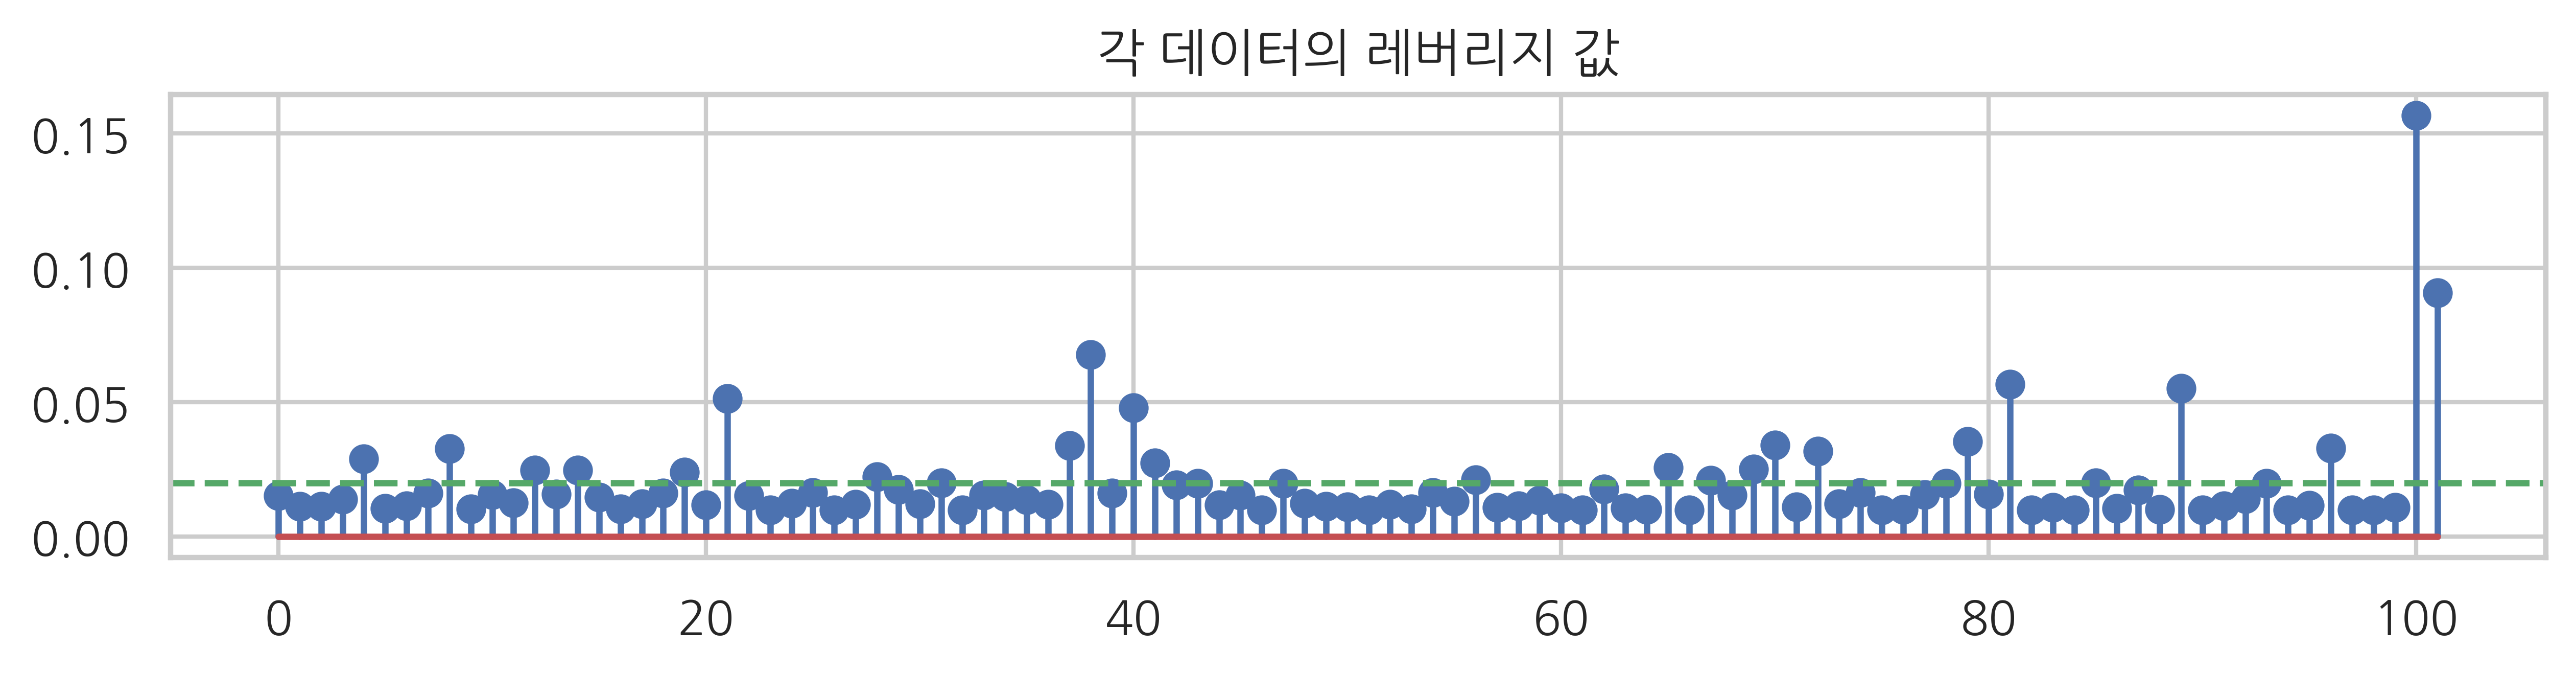

In [6]:
influence = result.get_influence()
hat = influence.hat_matrix_diag # 레버리지
lm = round(len(dfx.columns) / len(dfy), 2) # 레버리지의 평균
plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.axhline(lm, c='g', ls='--')
plt.title('각 데이터의 레버리지 값')
plt.show()

In [7]:
hat.sum() # 레버리지의 합 == 데이터 열의 개수

2.0000000000000004

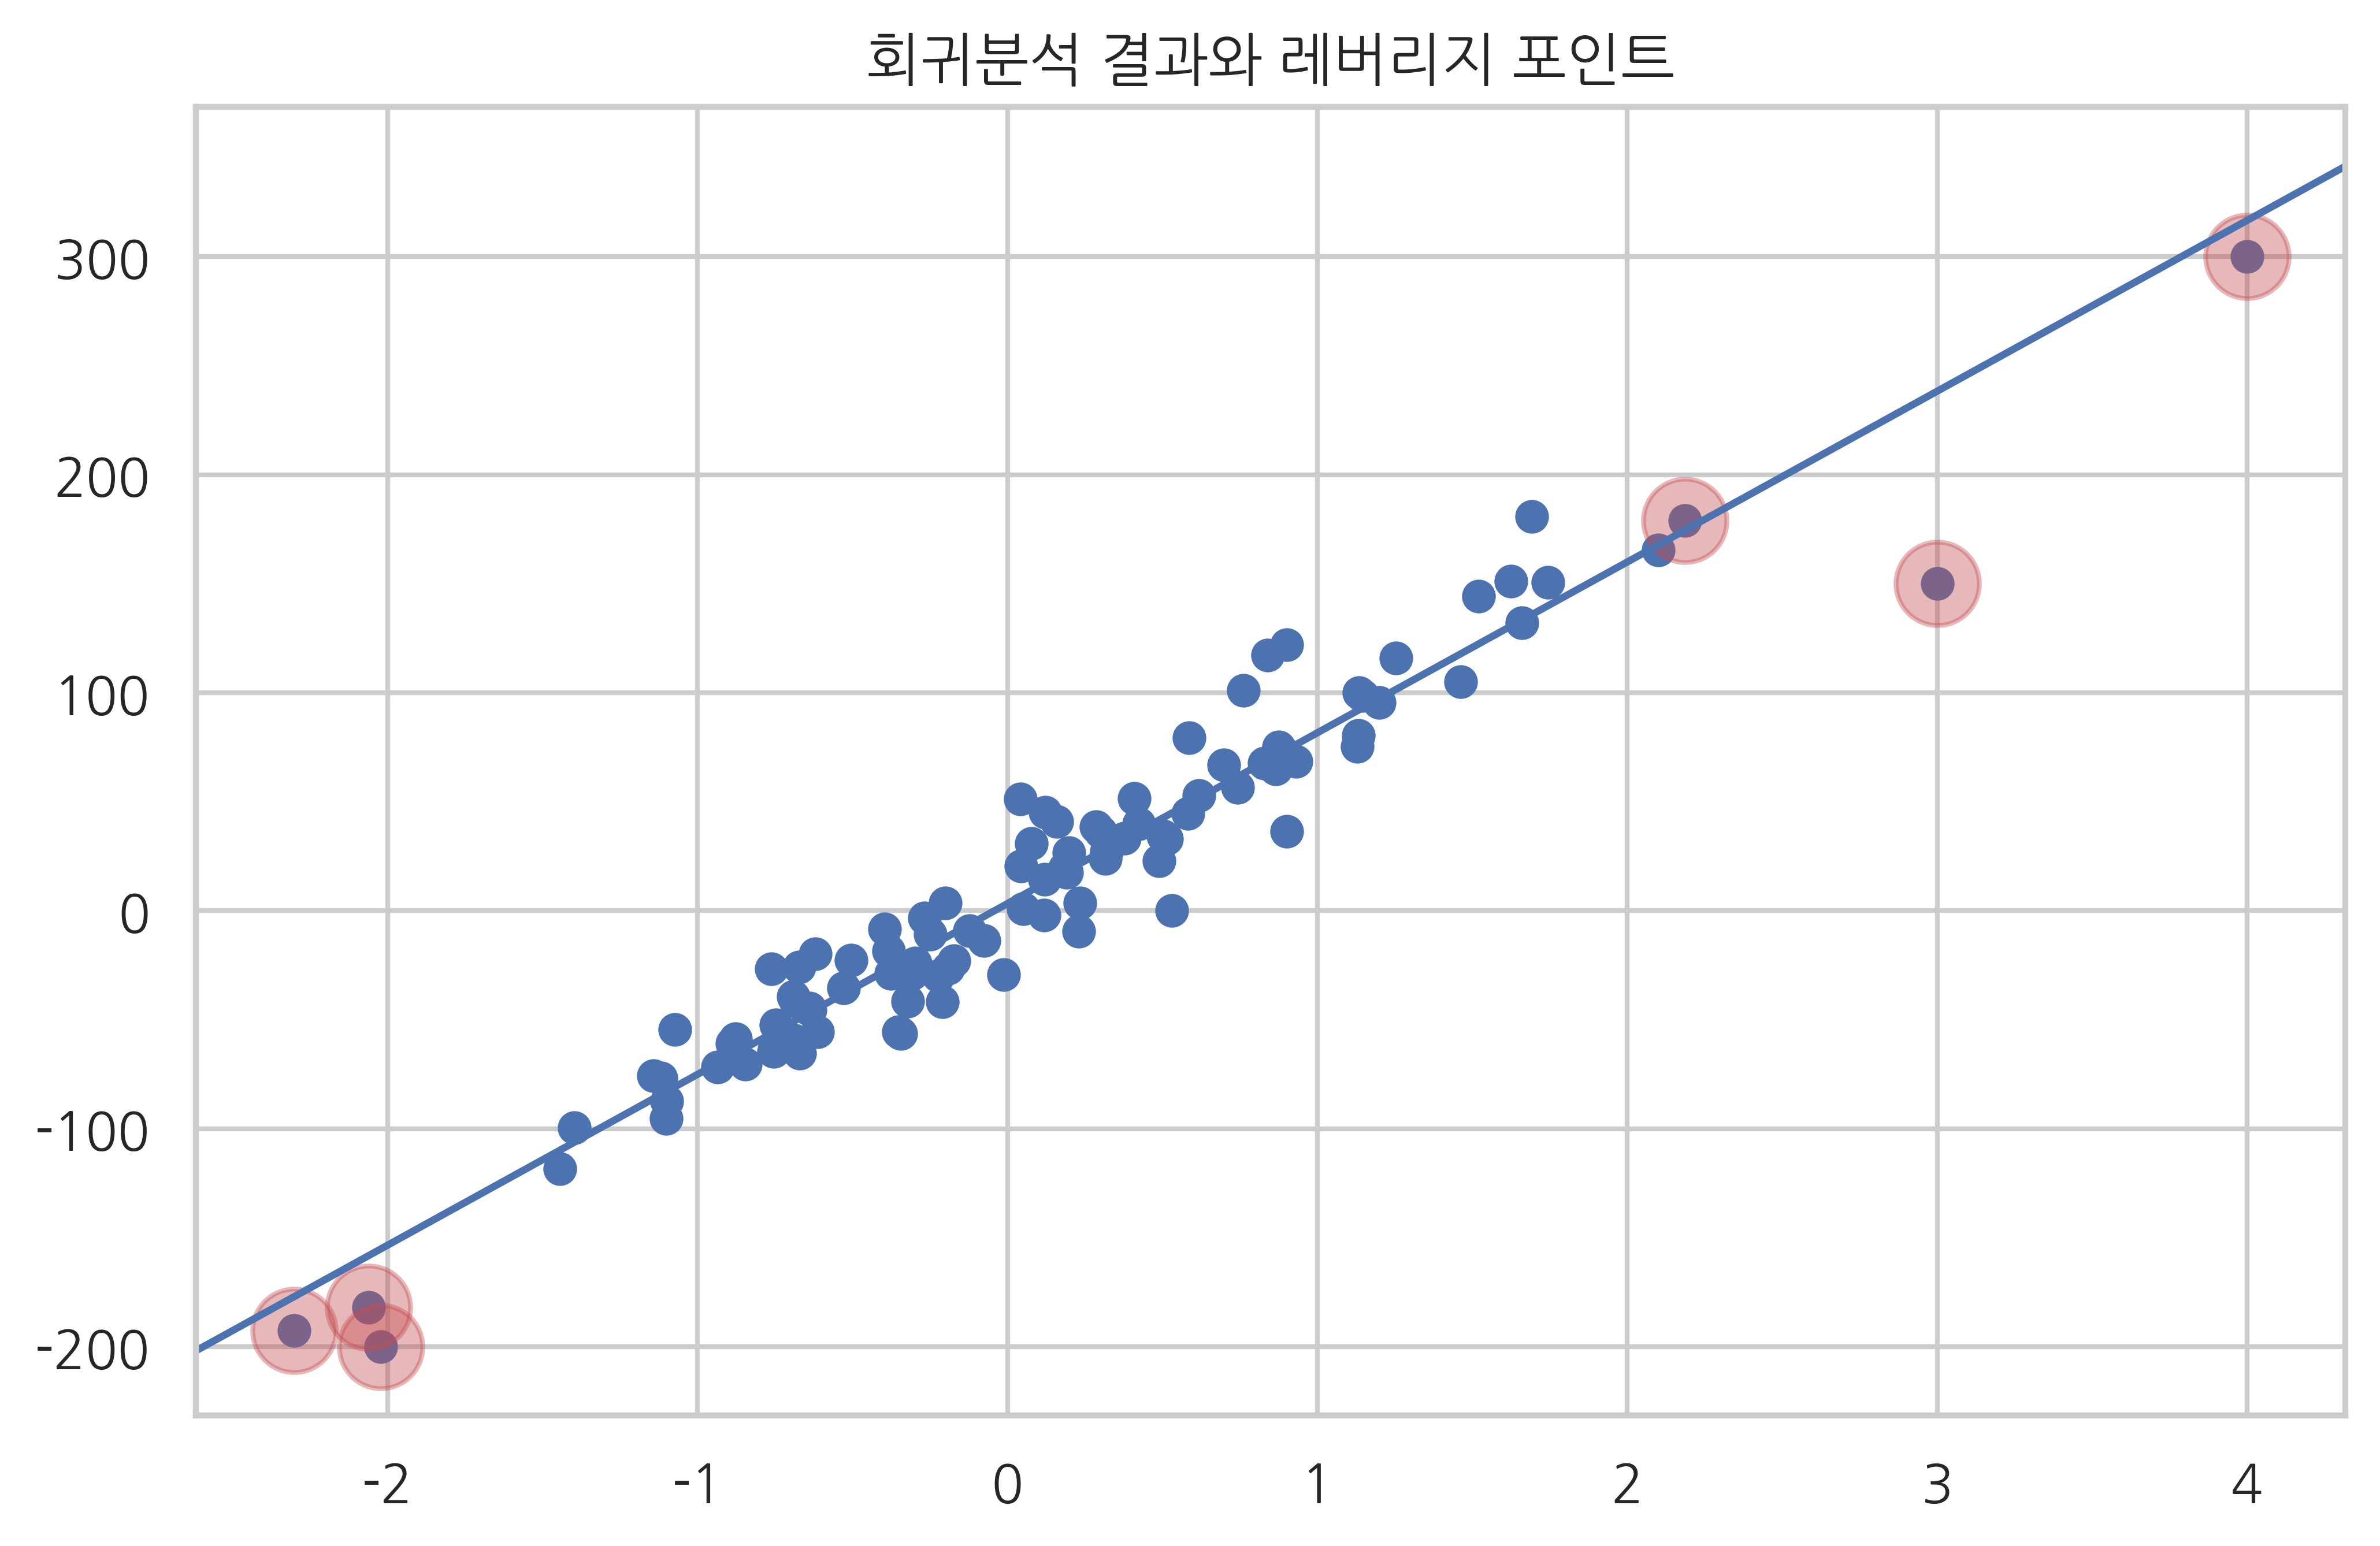

In [9]:
ax = plt.subplot()
plt.scatter(x0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(x0[idx], y[idx], s=300, c='r', alpha=0.4)
plt.title('회귀분석 결과와 레버리지 포인트')
plt.show()

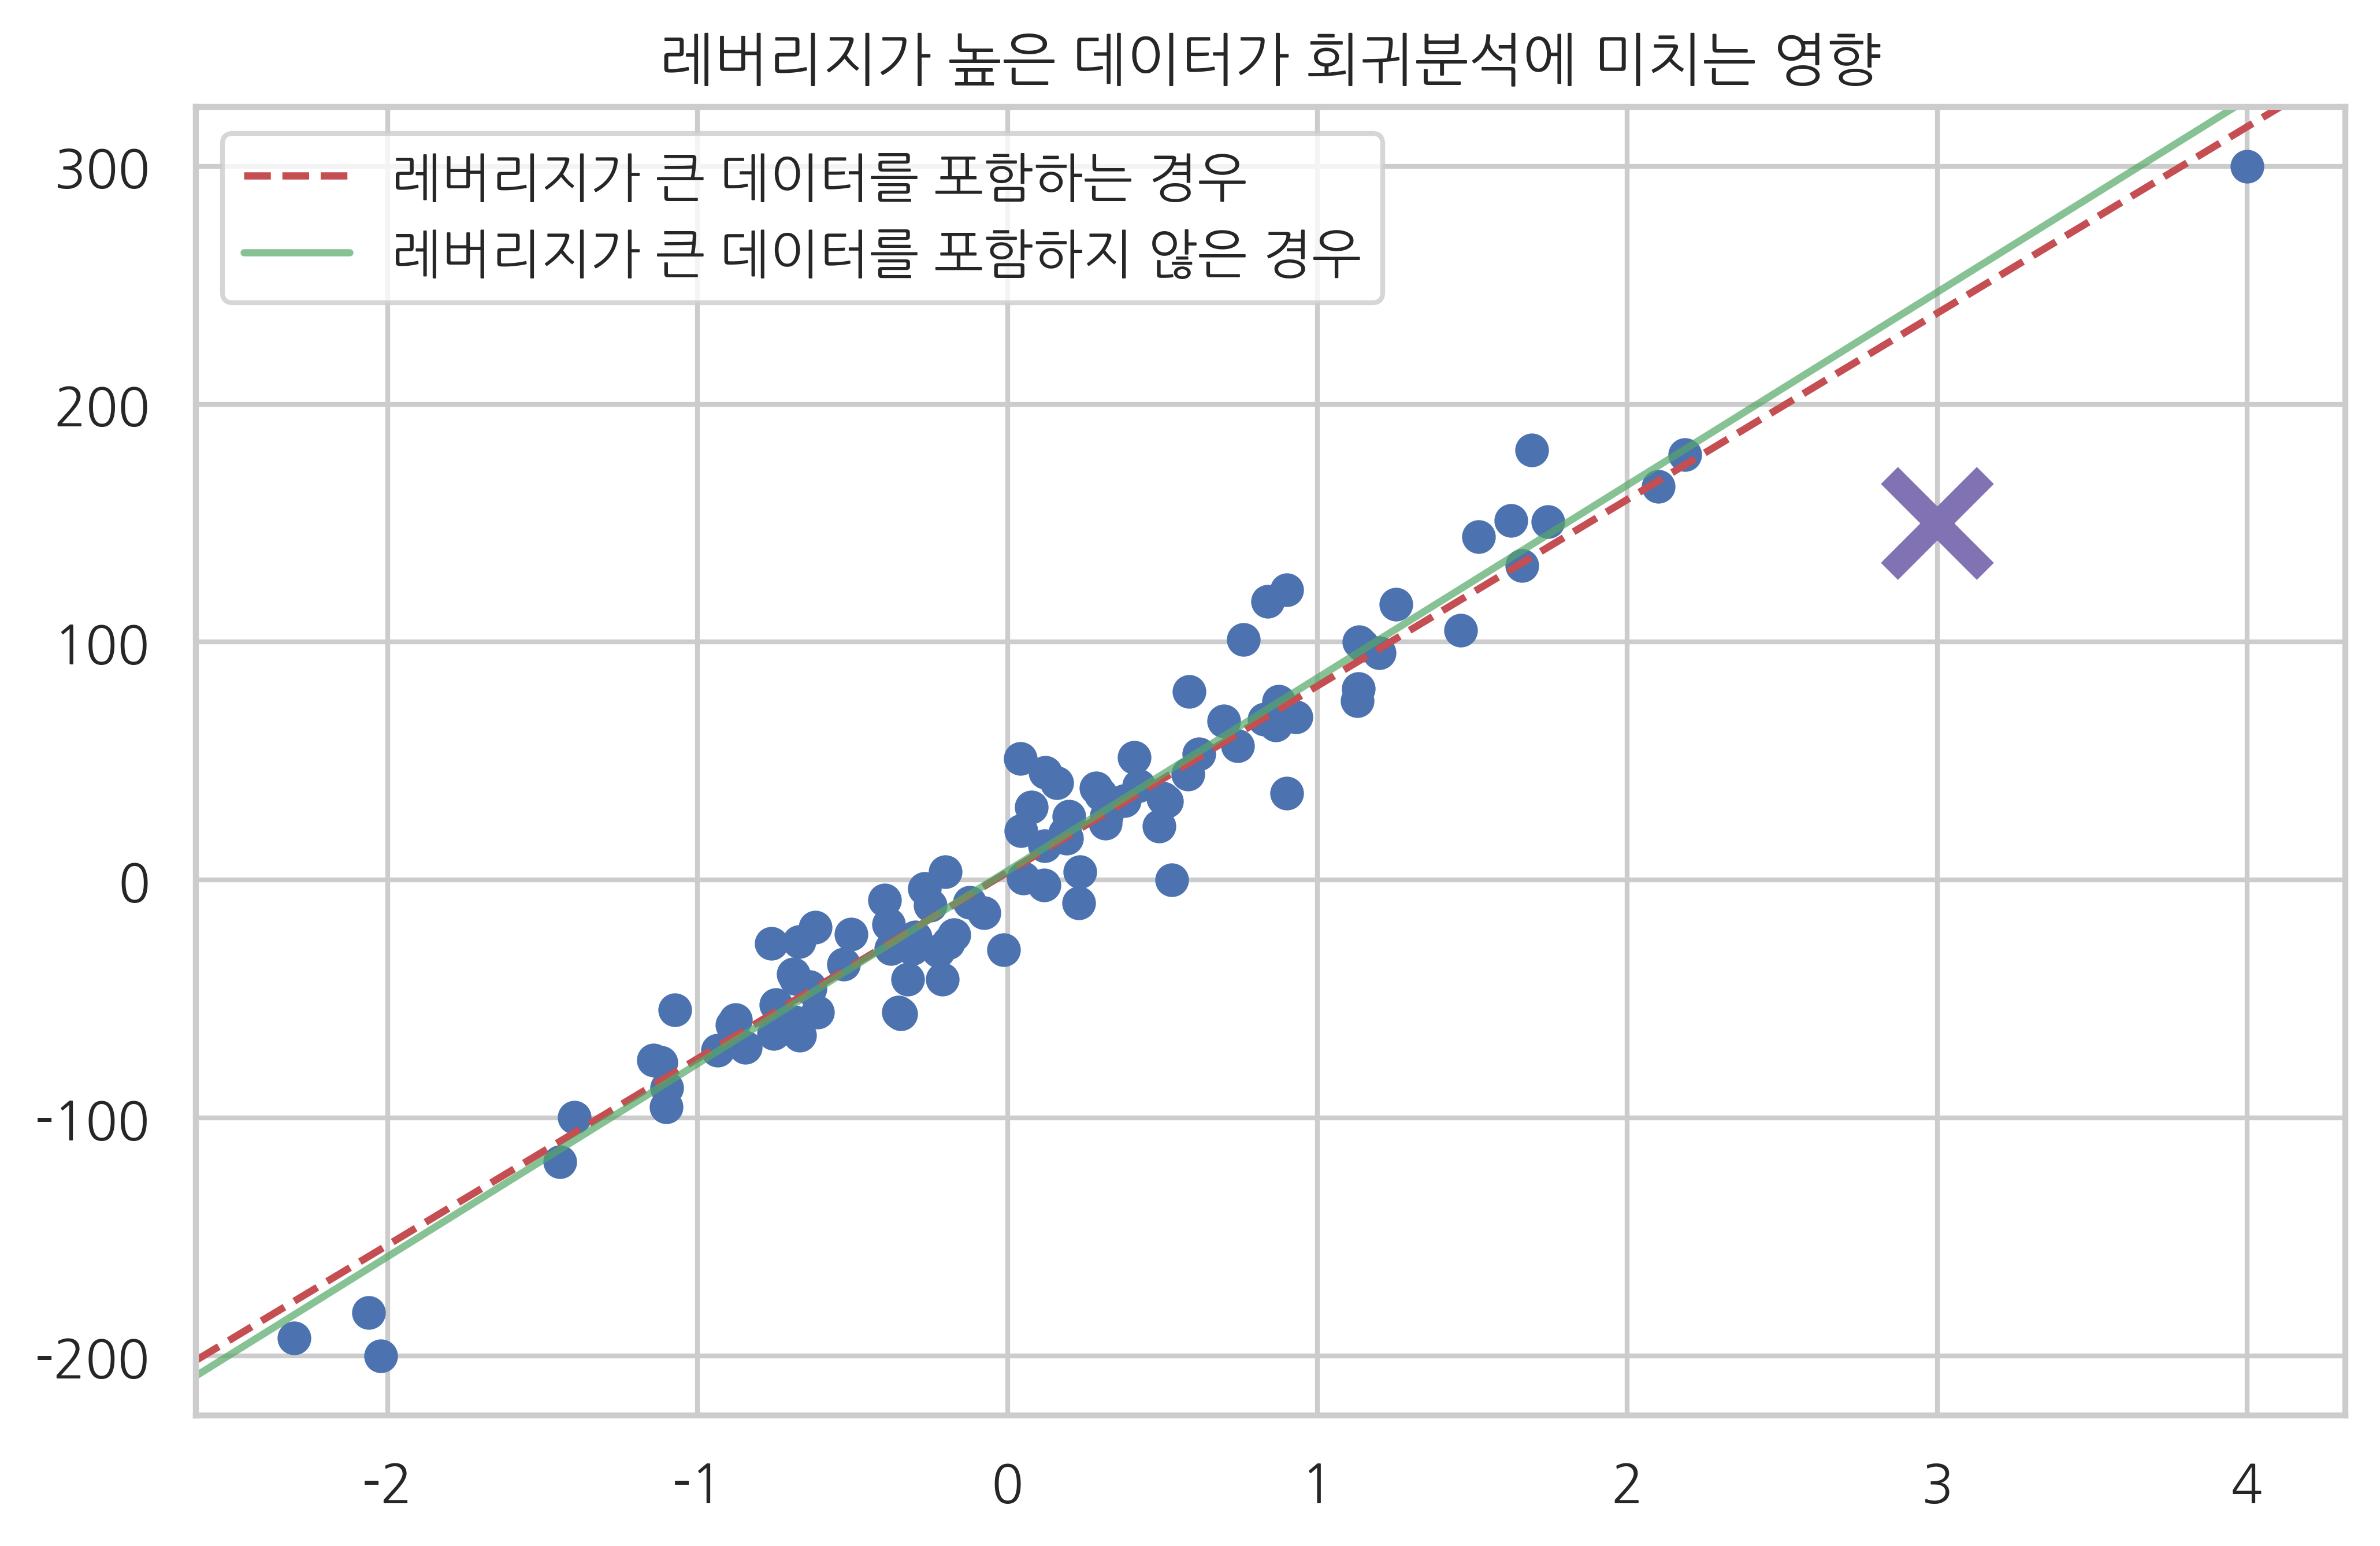

In [14]:
# 레버리지 큰 데이터의 영향
model2 = sm.OLS(y[:-1], x[:-1])
result2 = model2.fit()

ax = plt.subplot()
plt.scatter(x0, y)
sm.graphics.abline_plot(model_results=result, c='r', ls='--', ax=ax)
sm.graphics.abline_plot(model_results=result2, c='g', alpha=.7, ax=ax)

plt.plot(x0[-1], y[-1], marker='x', c='m', ms=20, mew=5)
plt.legend([u'레버리지가 큰 데이터를 포함하는 경우', u'레버리지가 큰 데이터를 포함하지 않은 경우'], loc='upper left')
plt.title('레버리지가 높은 데이터가 회귀분석에 미치는 영향')
plt.show()

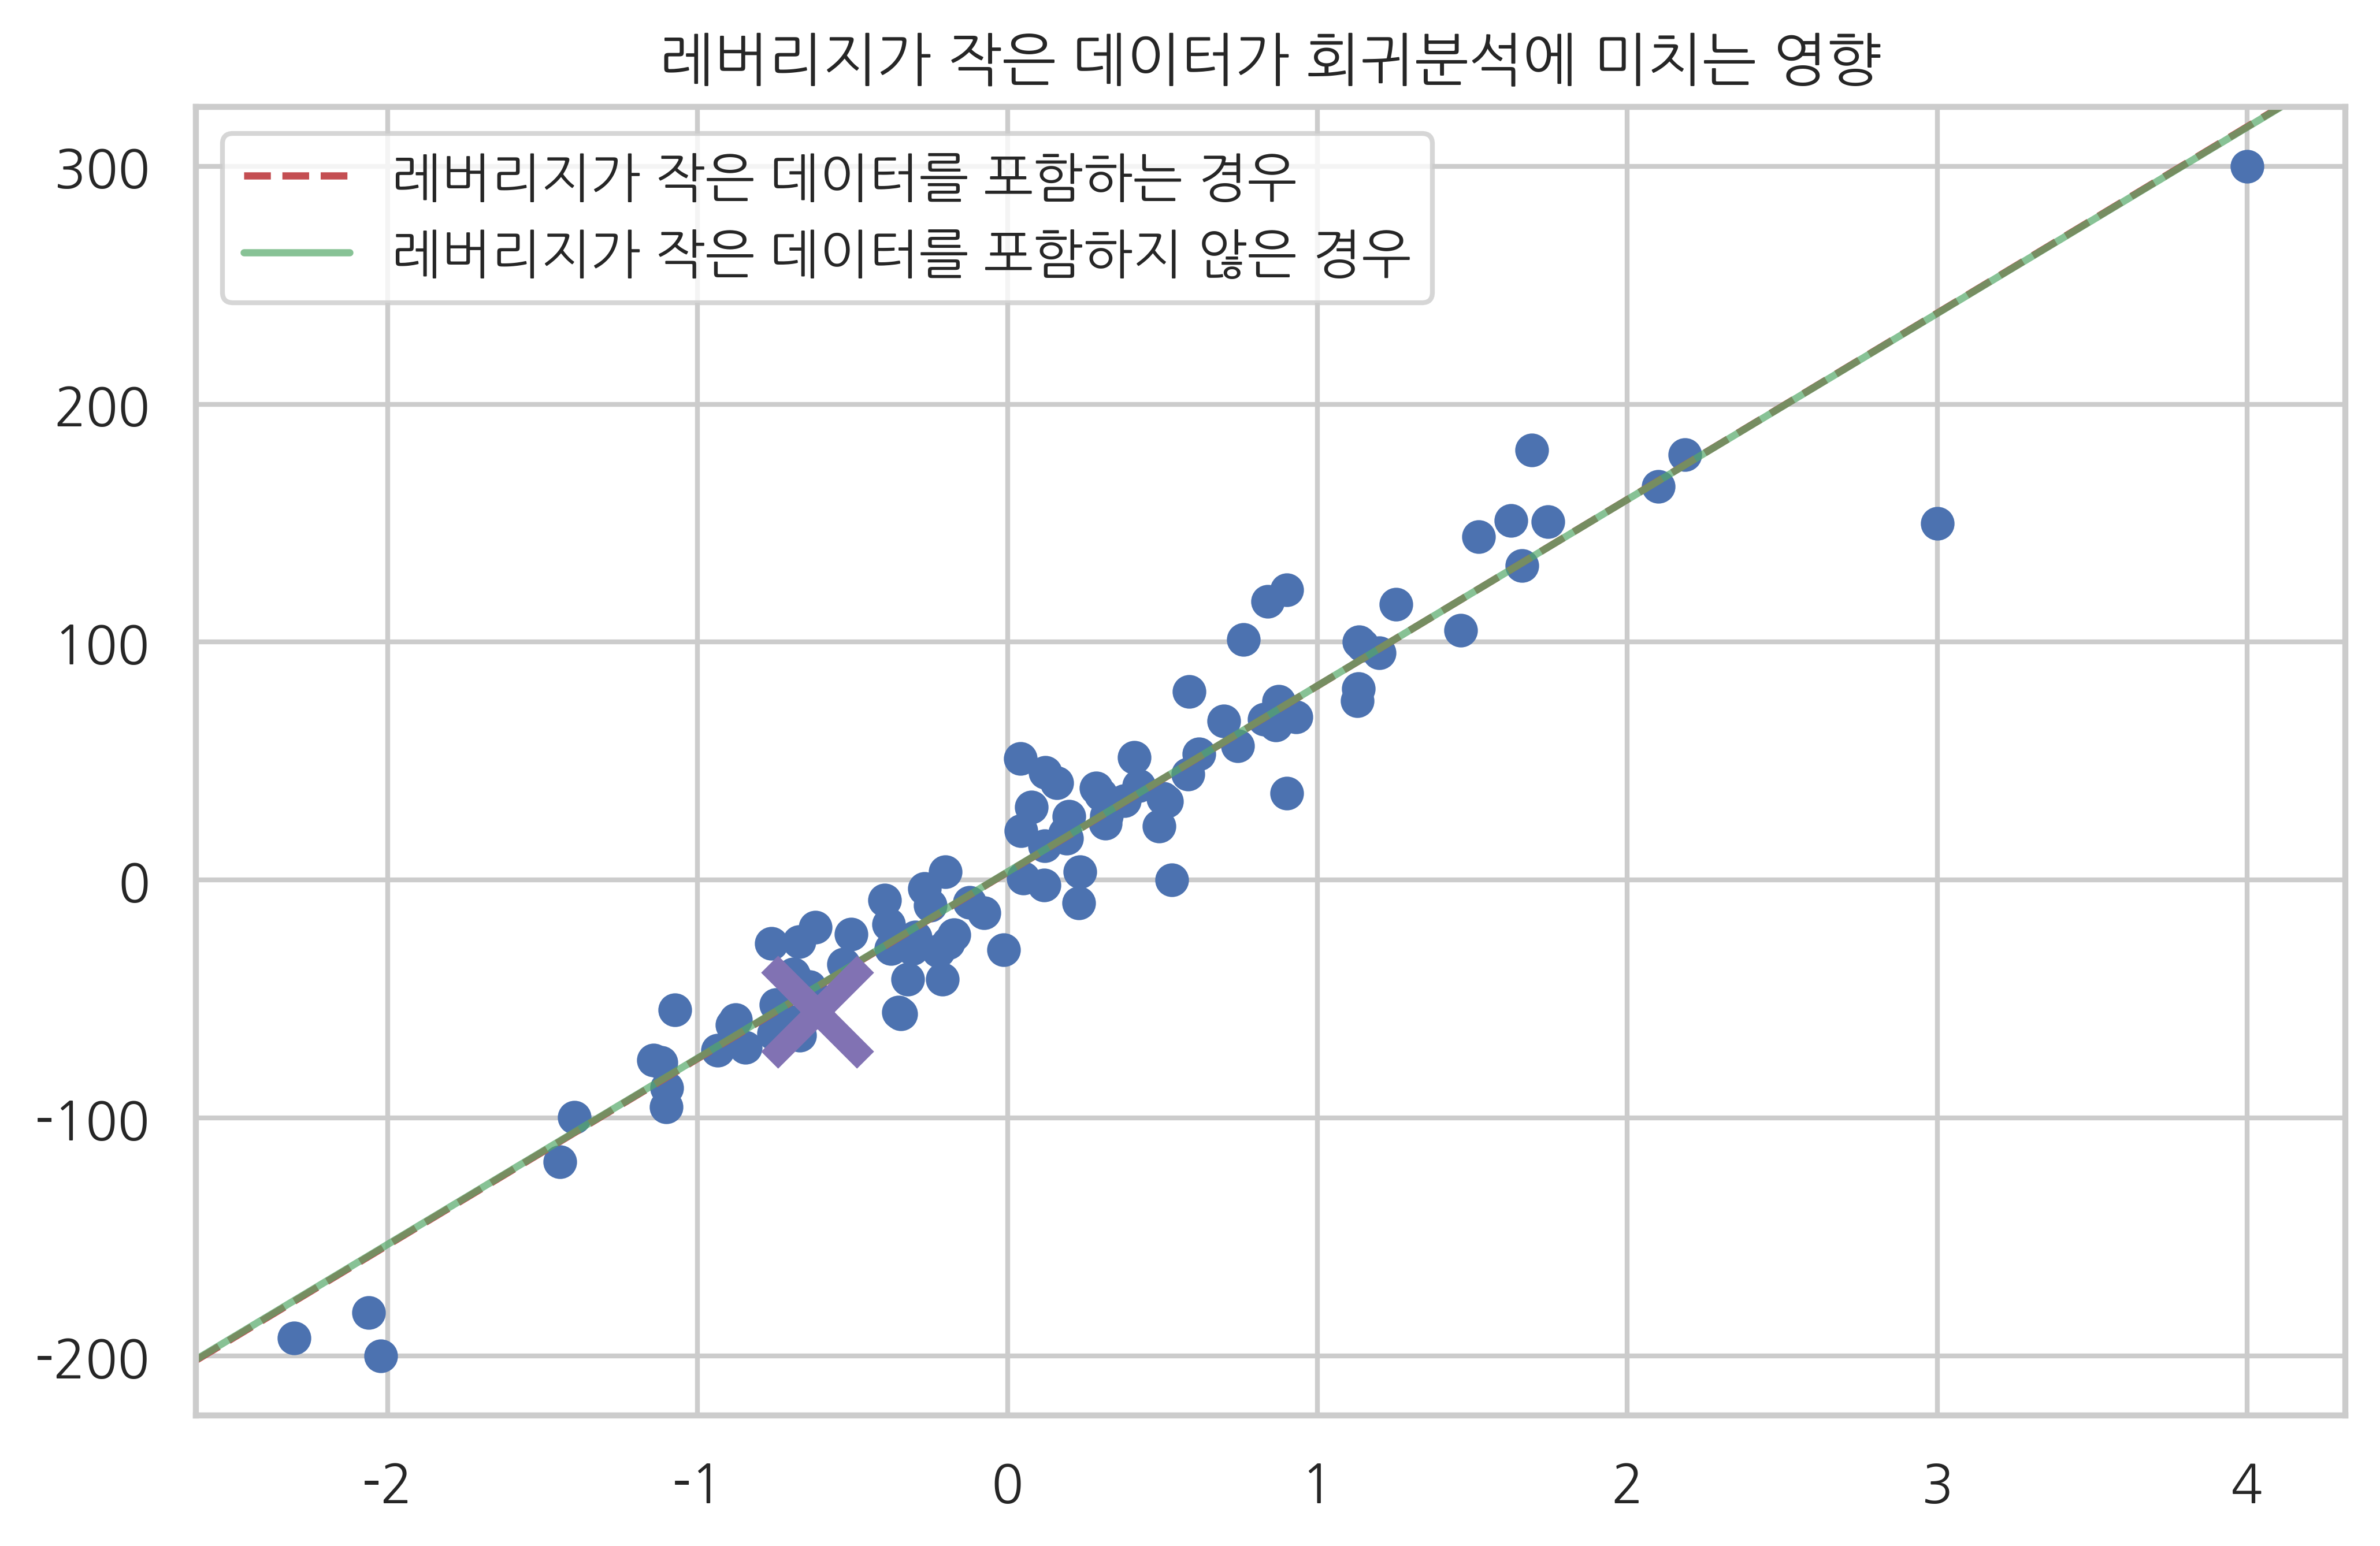

In [15]:
# 레버리지가 작은 데이터의 영향
model3 = sm.OLS(y[1:], x[1:])
result3 = model3.fit()

ax = plt.subplot()
plt.scatter(x0, y)
sm.graphics.abline_plot(model_results=result, c='r', ls='--', ax=ax)
sm.graphics.abline_plot(model_results=result3, c='g', alpha=.7, ax=ax)

plt.plot(x0[0], y[0], marker='x', c='m', ms=20, mew=5)
plt.legend([u'레버리지가 작은 데이터를 포함하는 경우', u'레버리지가 작은 데이터를 포함하지 않은 경우'], loc='upper left')
plt.title('레버리지가 작은 데이터가 회귀분석에 미치는 영향')
plt.show()

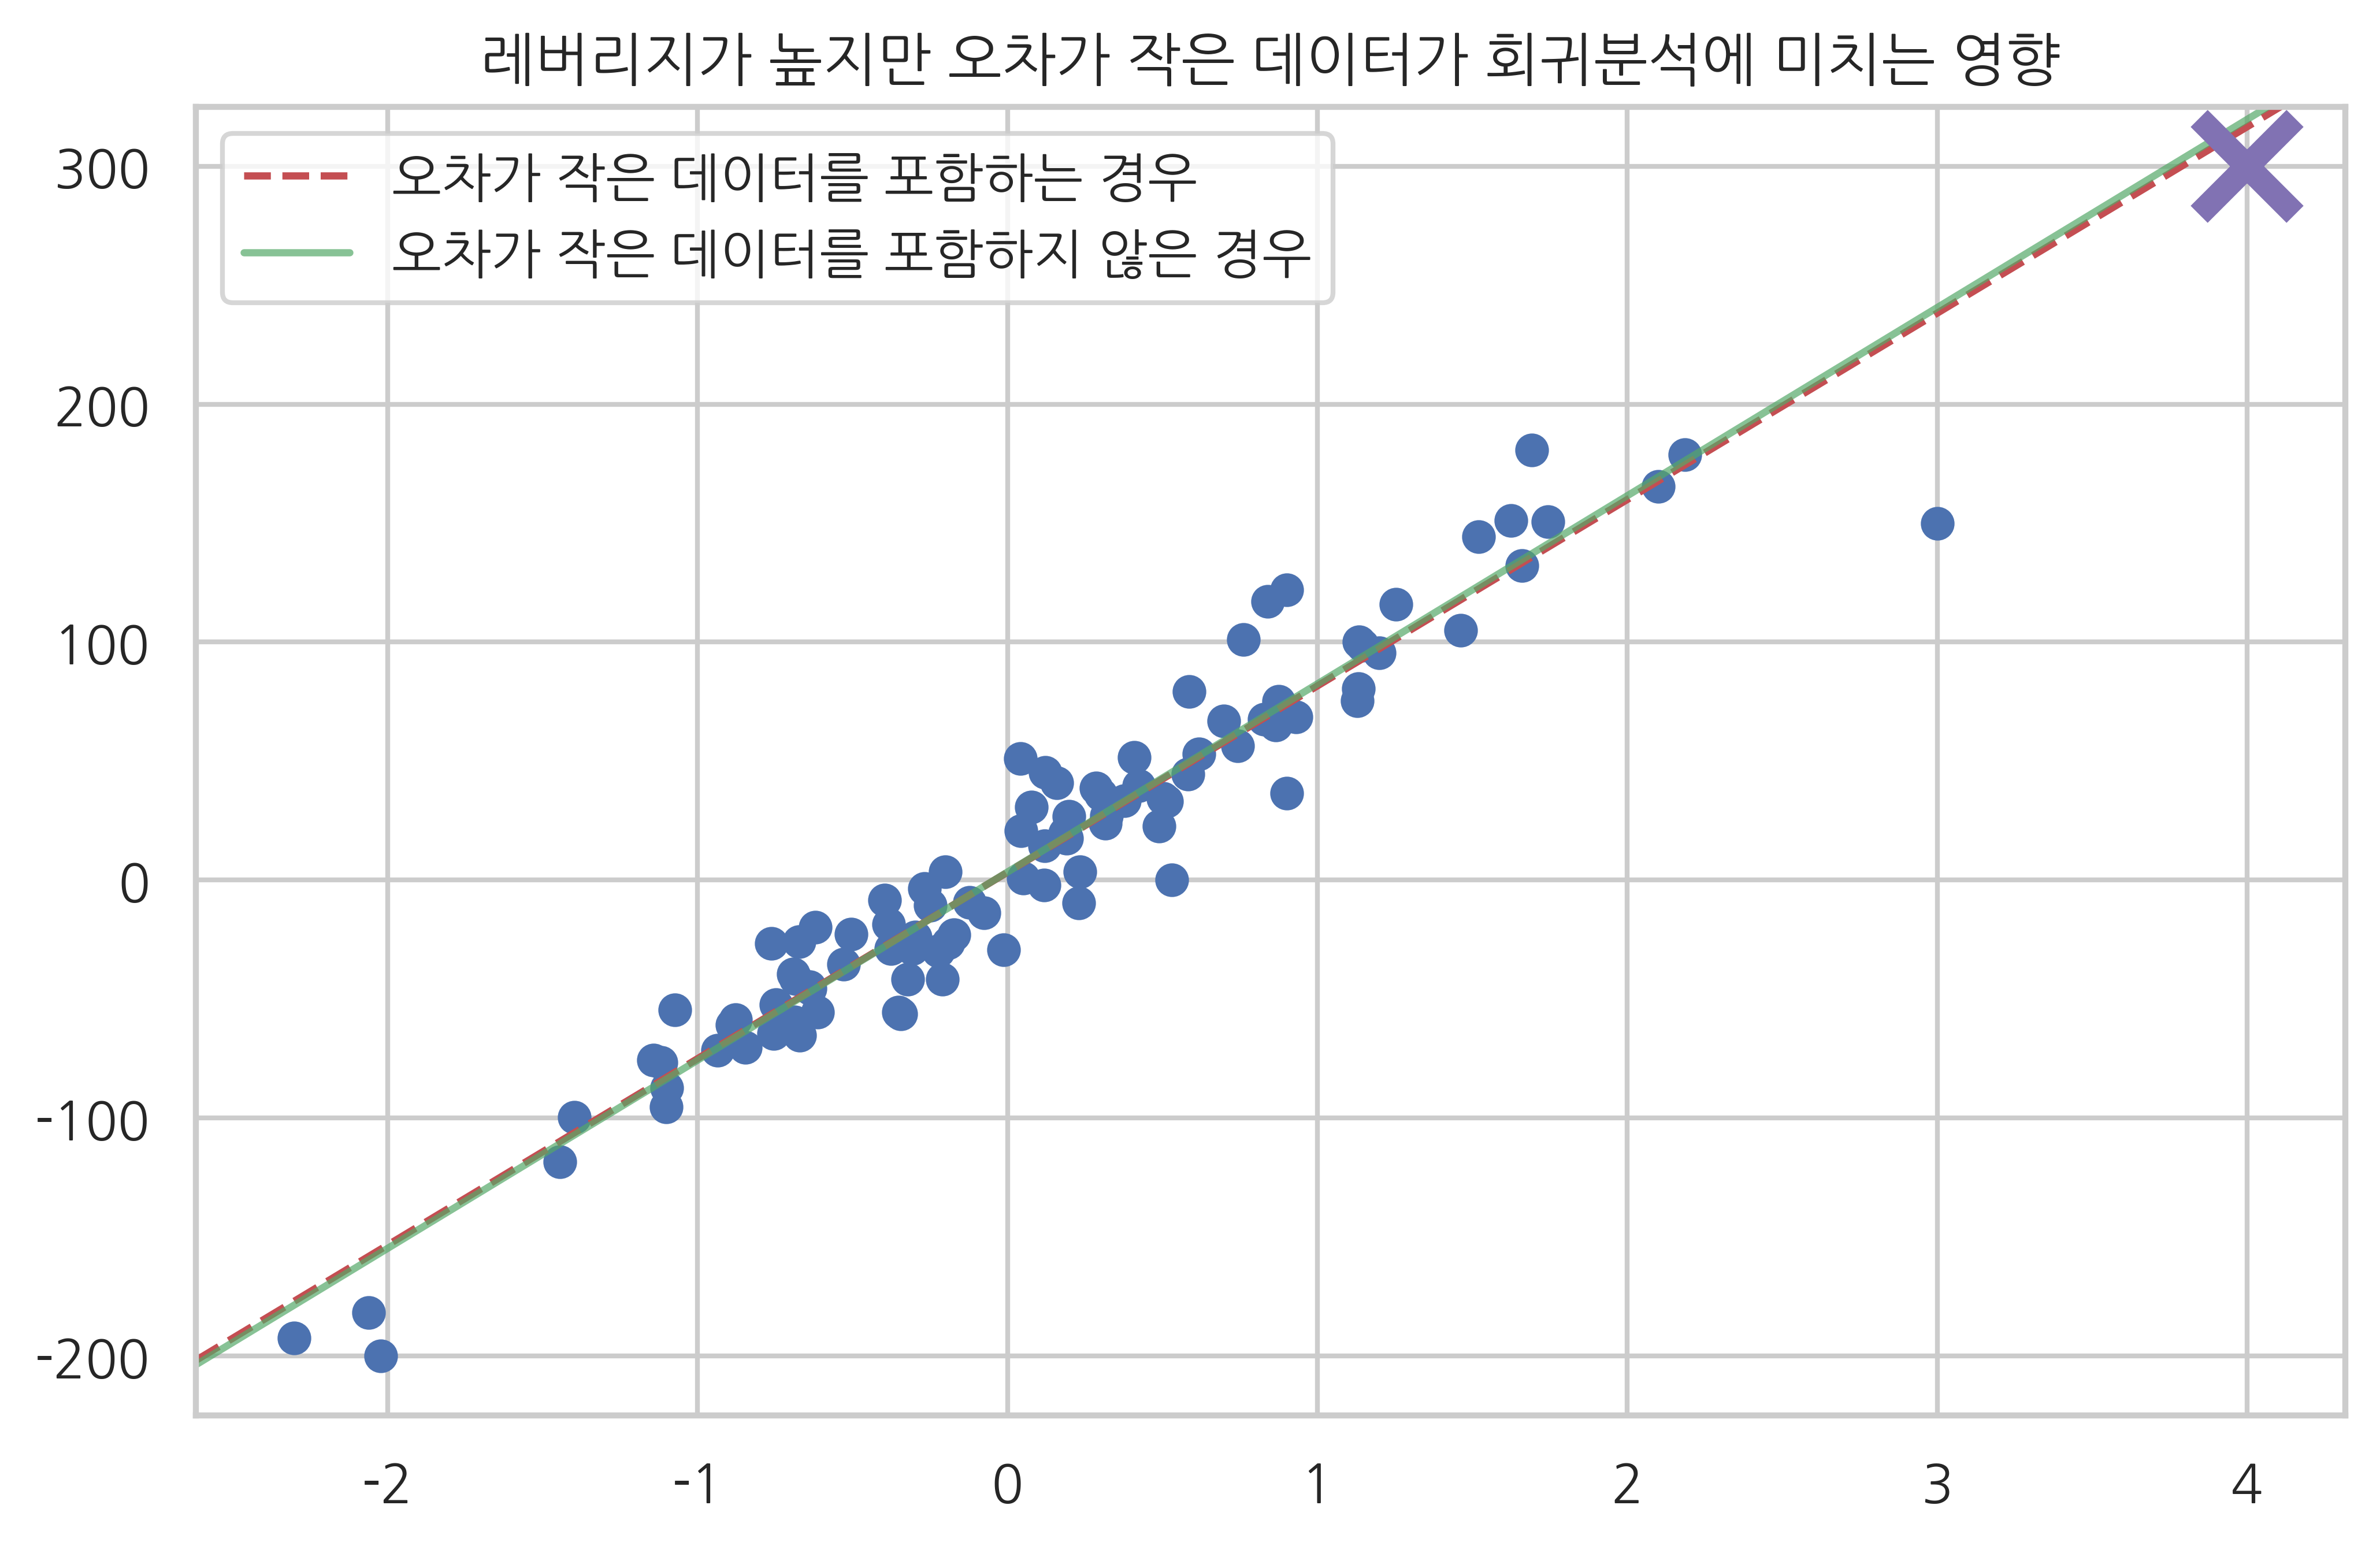

In [17]:
# 레버리지가 크지만, 오차가 작은 데이터의 영향
idx = np.array(list(range(100)) + [101])
model4 = sm.OLS(y[idx], x[idx, :])
result4 = model4.fit()

ax = plt.subplot()
plt.scatter(x0, y)
sm.graphics.abline_plot(model_results=result, c='r', ls='--', ax=ax)
sm.graphics.abline_plot(model_results=result4, c='g', alpha=.7, ax=ax)

plt.plot(x0[-2], y[-2], marker='x', c='m', ms=20, mew=5)
plt.legend([u'오차가 작은 데이터를 포함하는 경우', u'오차가 작은 데이터를 포함하지 않은 경우'], loc='upper left')
plt.title('레버리지가 높지만 오차가 작은 데이터가 회귀분석에 미치는 영향')
plt.show()

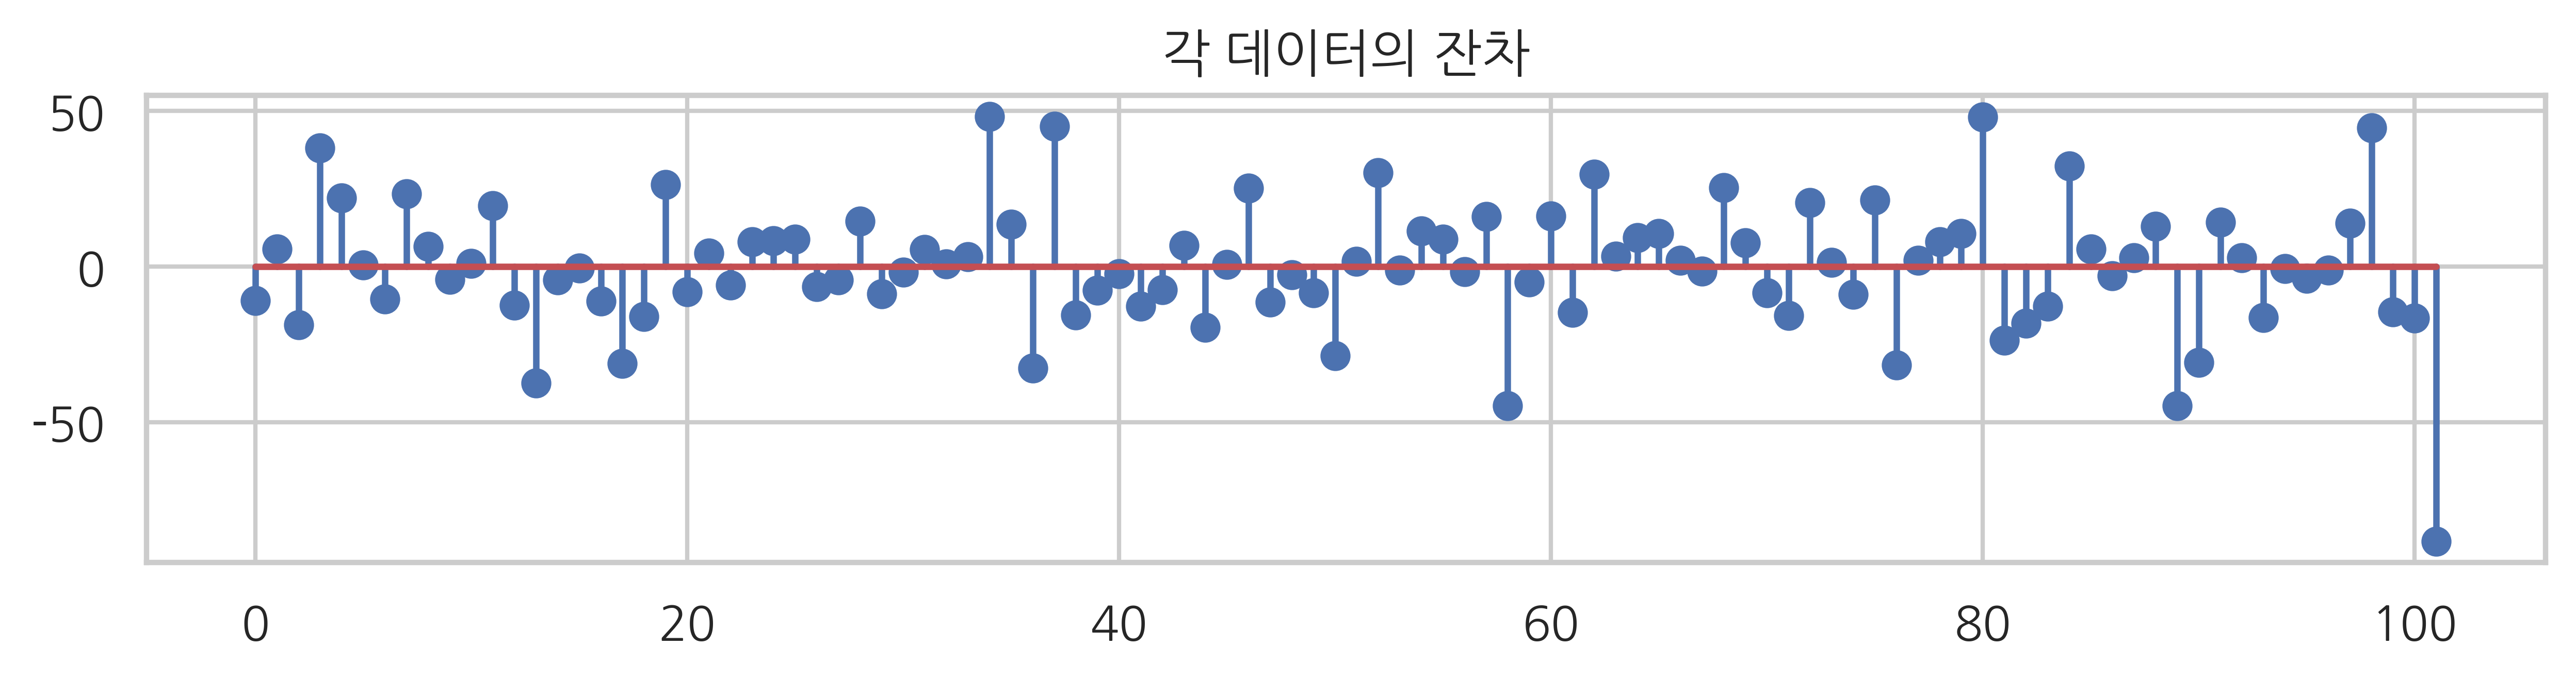

In [18]:
# 잔차
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.title('각 데이터의 잔차')
plt.show()

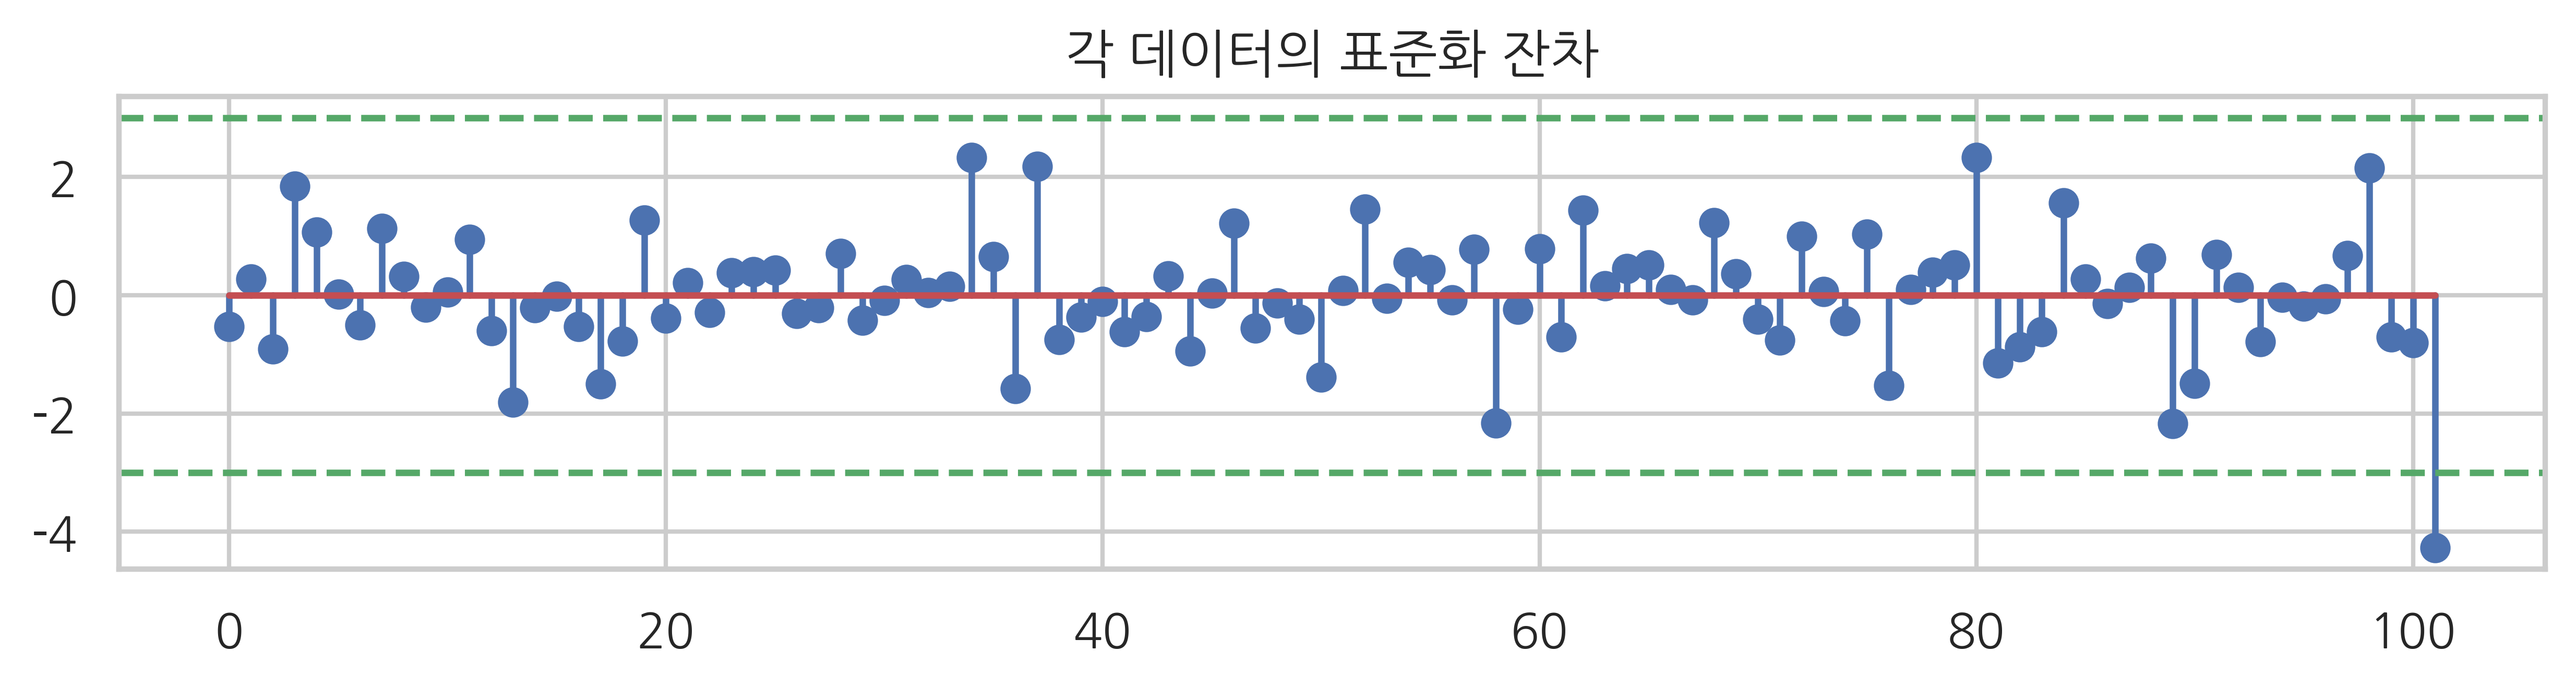

In [19]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(3, c='g', ls='--')
plt.axhline(-3, c='g', ls='--')
plt.title('각 데이터의 표준화 잔차')
plt.show()

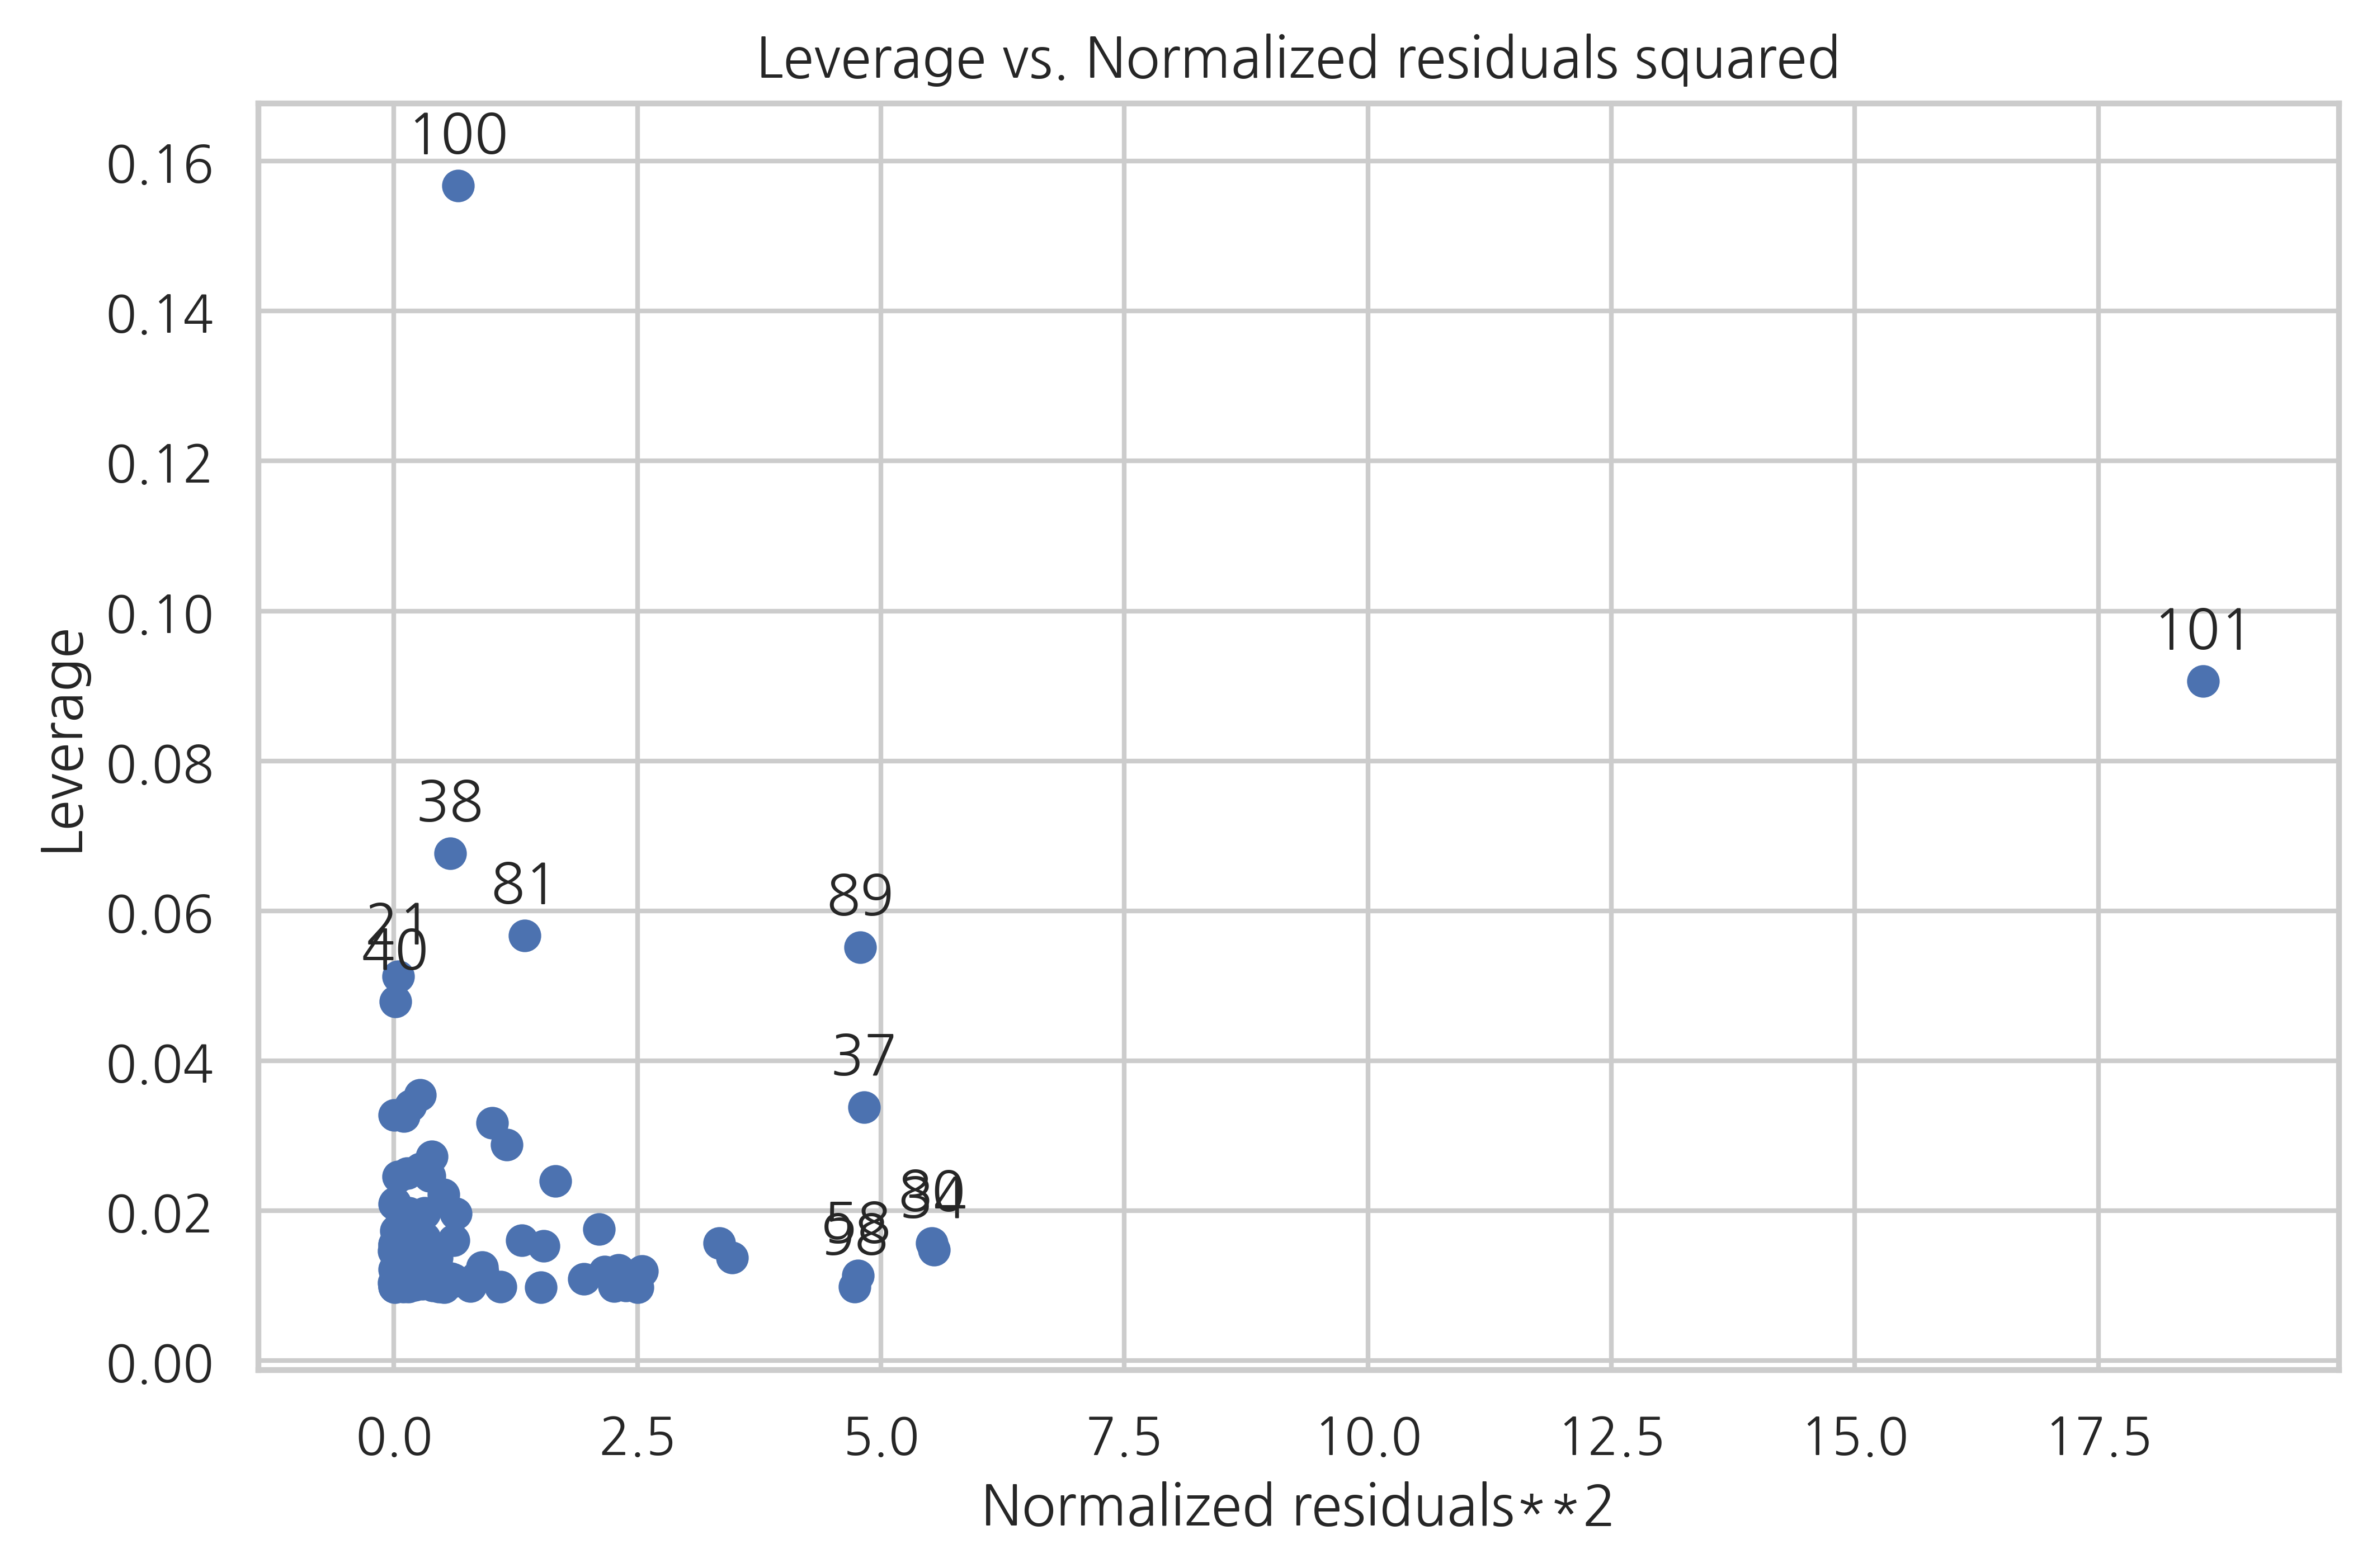

In [20]:
# Cook's Distance : 잔차와 레버리지 동시에 보기 위한 기준
sm.graphics.plot_leverage_resid2(result)
plt.show()

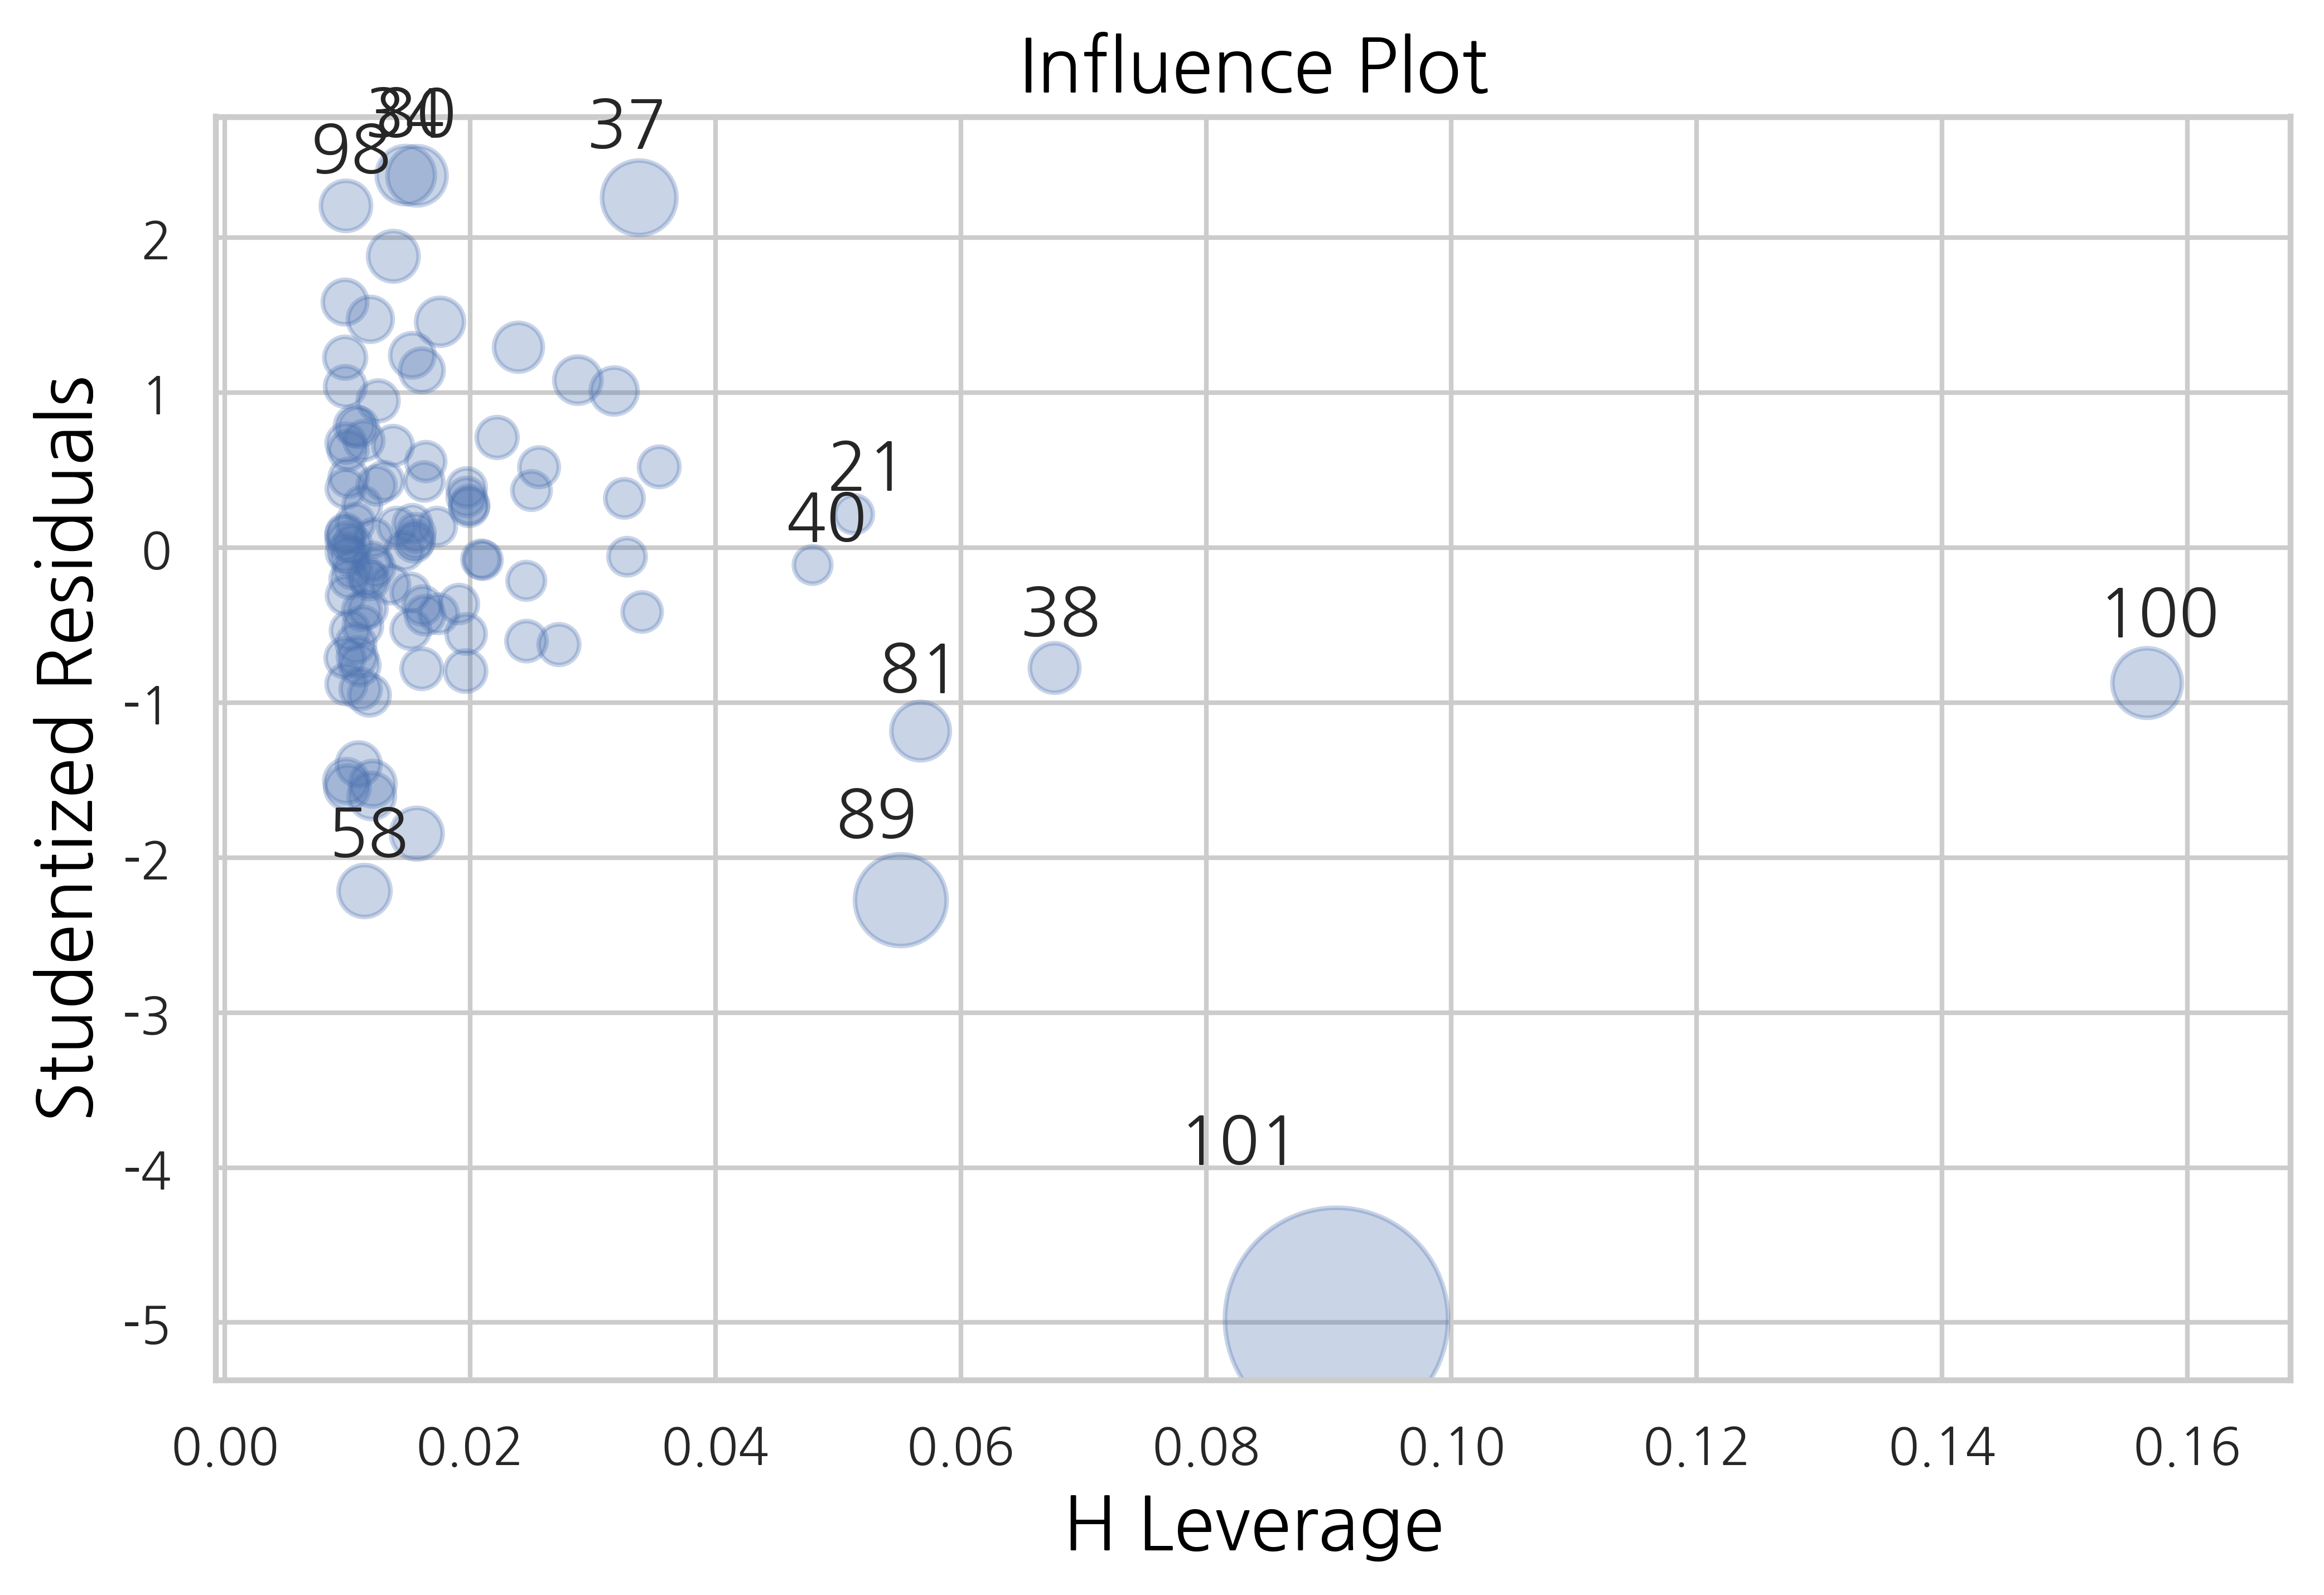

In [21]:
sm.graphics.influence_plot(result, plot_alpha=.3)
plt.show()

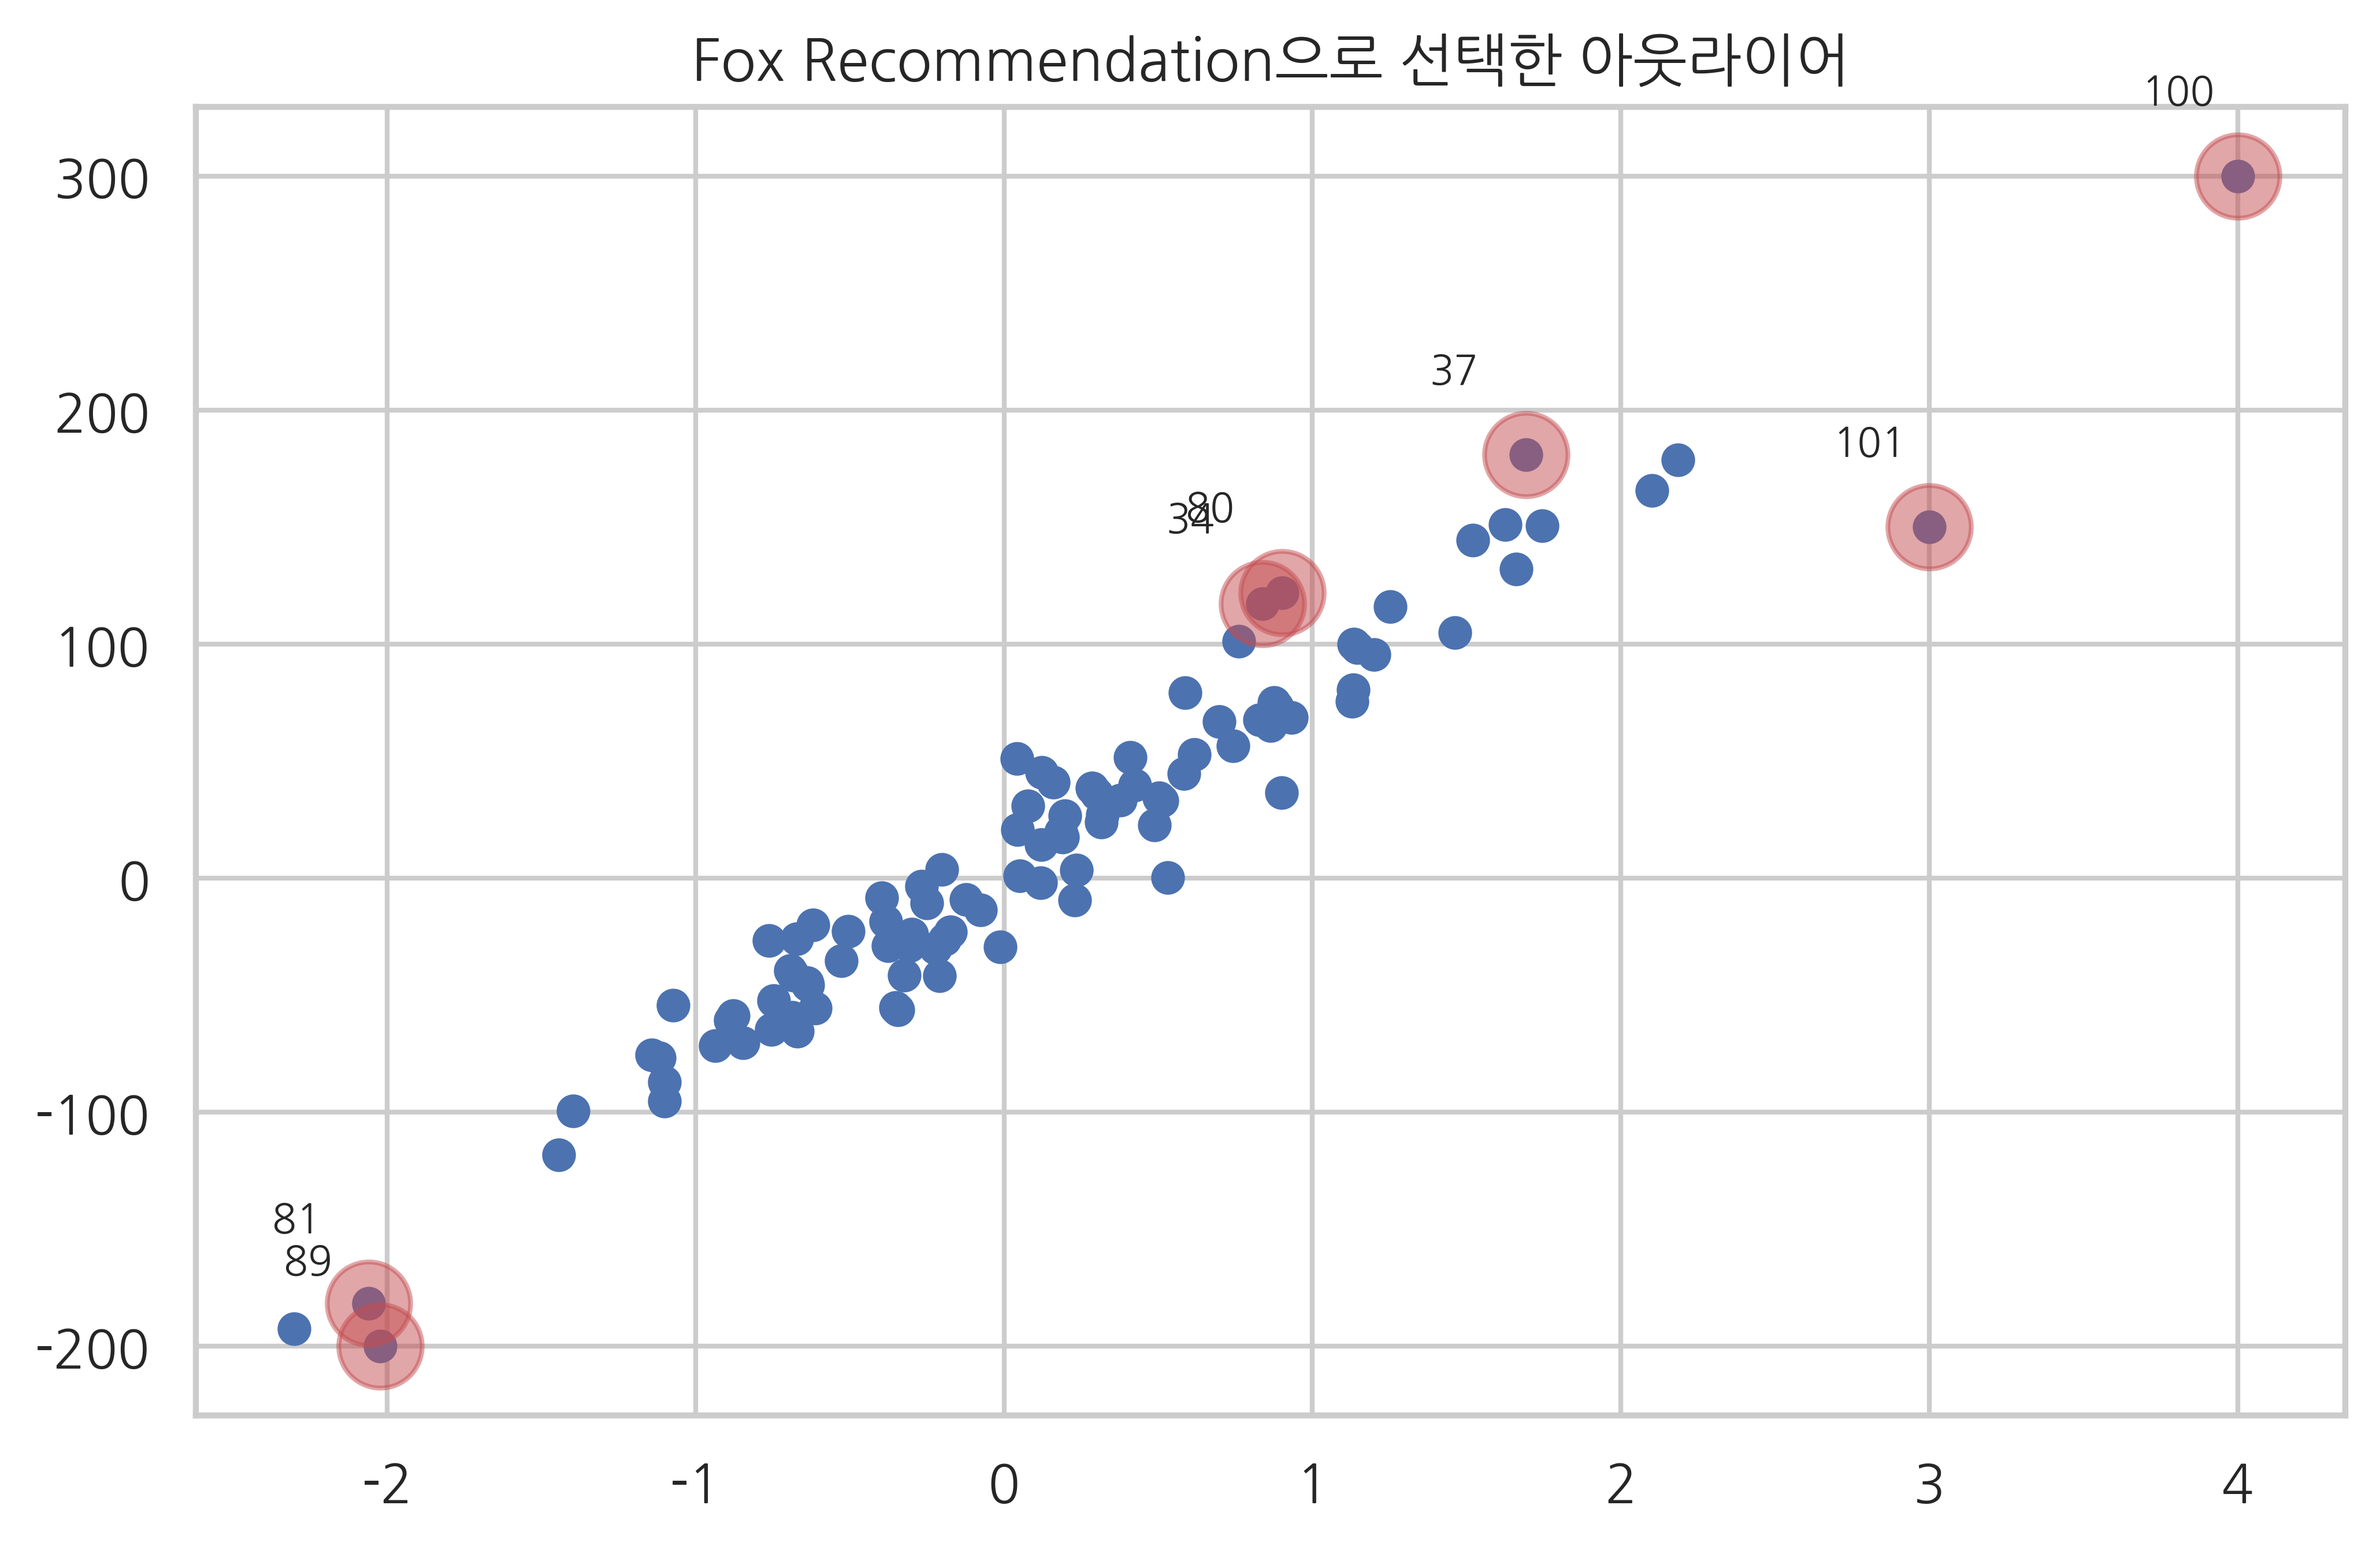

In [23]:
from statsmodels.graphics import utils
cooks_d2, pvlas = influence.cooks_distance
k = influence.k_vars
fox_cr = 4 / (len(y) - k - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(x0, y)
plt.scatter(x0[idx], y[idx], s=300, c='r', alpha=.5)
utils.annotate_axes(range(len(idx)), idx, list(zip(x0[idx], y[idx])), [(-20, 15)] * len(idx), size='small', ax=ax)
plt.title('Fox Recommendation으로 선택한 아웃라이어')
plt.show()

In [ ]:
# 보스턴 집값 예측 문제

### 5.4 분산분석과 모형성능

In [3]:
from sklearn.datasets import make_regression
x0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfx0 = pd.DataFrame(x0, columns=['x'])
dfx = sm.add_constant(dfx0)
dfy = pd.DataFrame(y, columns=['Y'])
df = pd.concat([dfx, dfy], axis=1)

model = sm.OLS.from_formula('y ~ x', data=df)
result = model.fit()

In [5]:
print(f'TSS = {result.uncentered_tss}')
print(f'ESS = {result.mse_model}')
print(f'RSS = {result.ssr}')
print(f'ESS + RSS = {result.mse_model + result.ssr}')
print(f'R squared = {result.rsquared}')

TSS = 291345.75789830607
ESS = 188589.61349210917
RSS = 102754.33755137533
ESS + RSS = 291343.9510434845
R squared = 0.6473091780922586


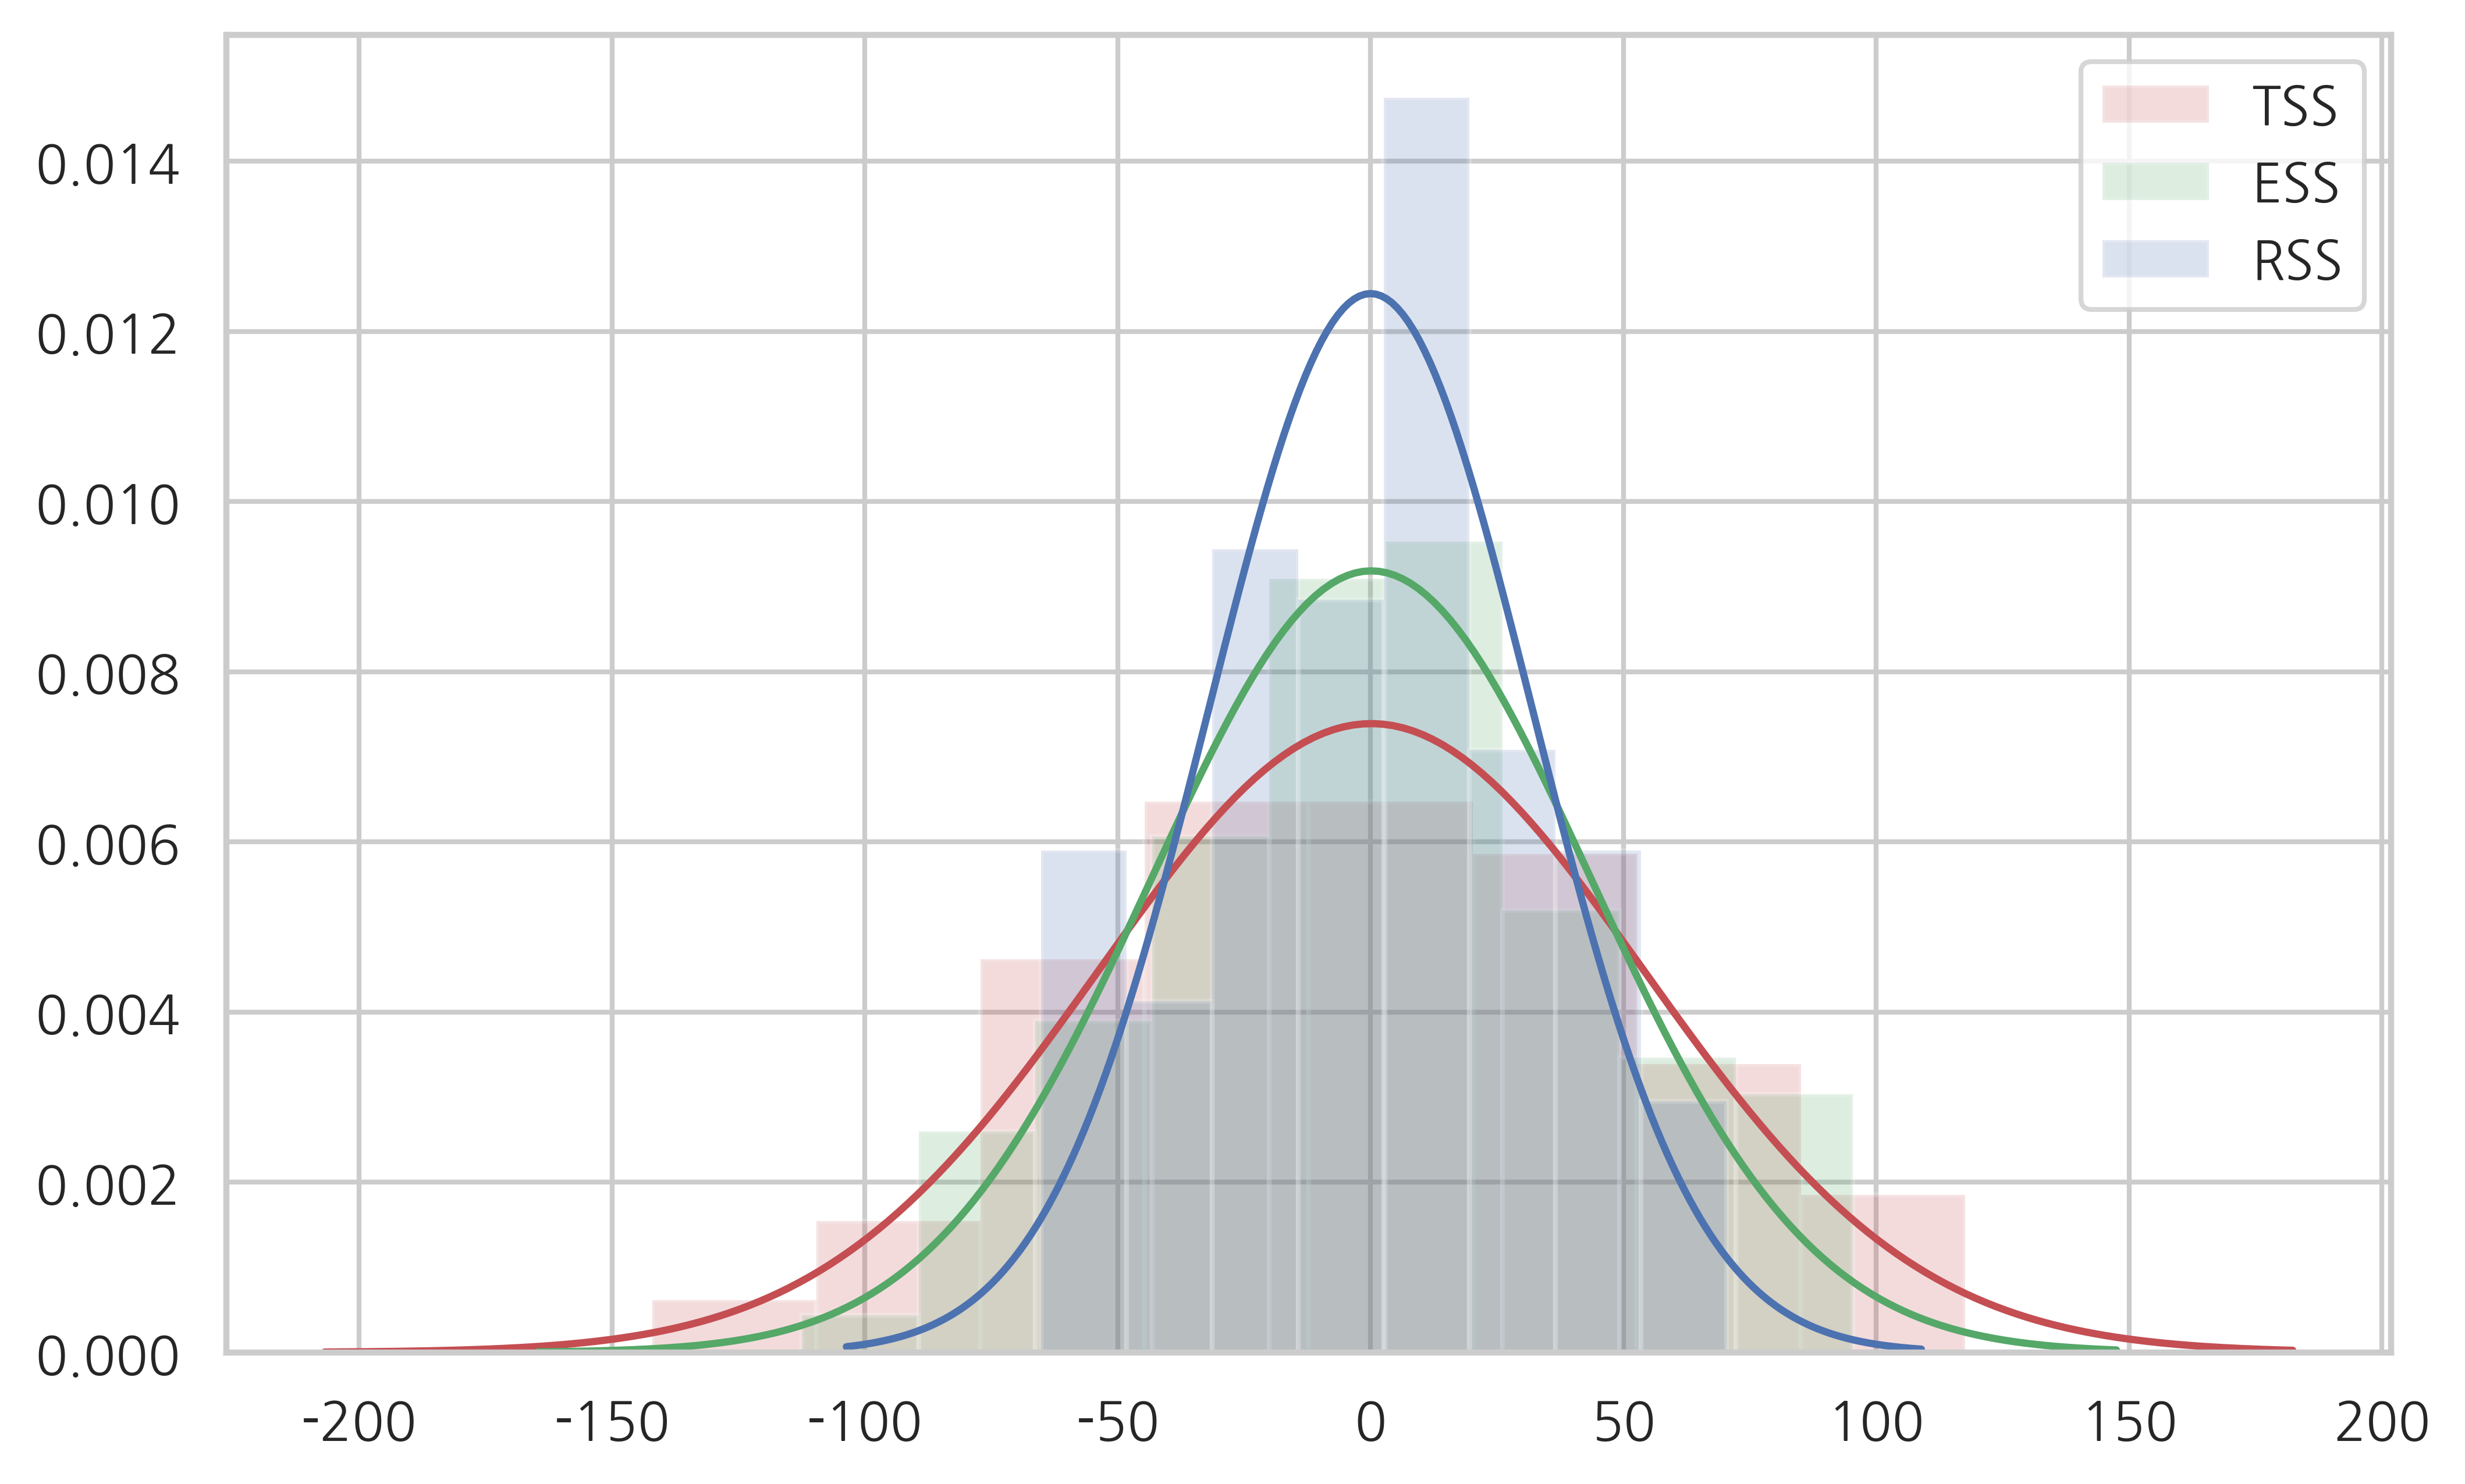

In [6]:
sns.distplot(y, kde=False, fit=sp.stats.norm, hist_kws={'color': 'r', 'alpha': 0.2}, fit_kws={'color': 'r'}, label='TSS')
sns.distplot(result.fittedvalues, kde=False, fit=sp.stats.norm, hist_kws={'color': 'g', 'alpha': 0.2}, fit_kws={'color': 'g'}, label='ESS')
sns.distplot(result.resid, kde=False, fit=sp.stats.norm, hist_kws={'color': 'b', 'alpha': 0.2}, fit_kws={'color': 'b'}, label='RSS')
plt.legend()
plt.show()

In [7]:
sm.stats.anova_lm(result)
# 분산분석표 : 모형을 'from_formula'메서트로 생성

df         sum_sq        mean_sq           F        PR(>F)
x          1.0  188589.613492  188589.613492  179.863766  6.601482e-24
Residual  98.0  102754.337551    1048.513648         NaN           NaN

In [8]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           6.60e-24
Time:                        23:19:31   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

결정계수와 상관계수
- y, yhat의 상관계수 r의 제곱 == R squared

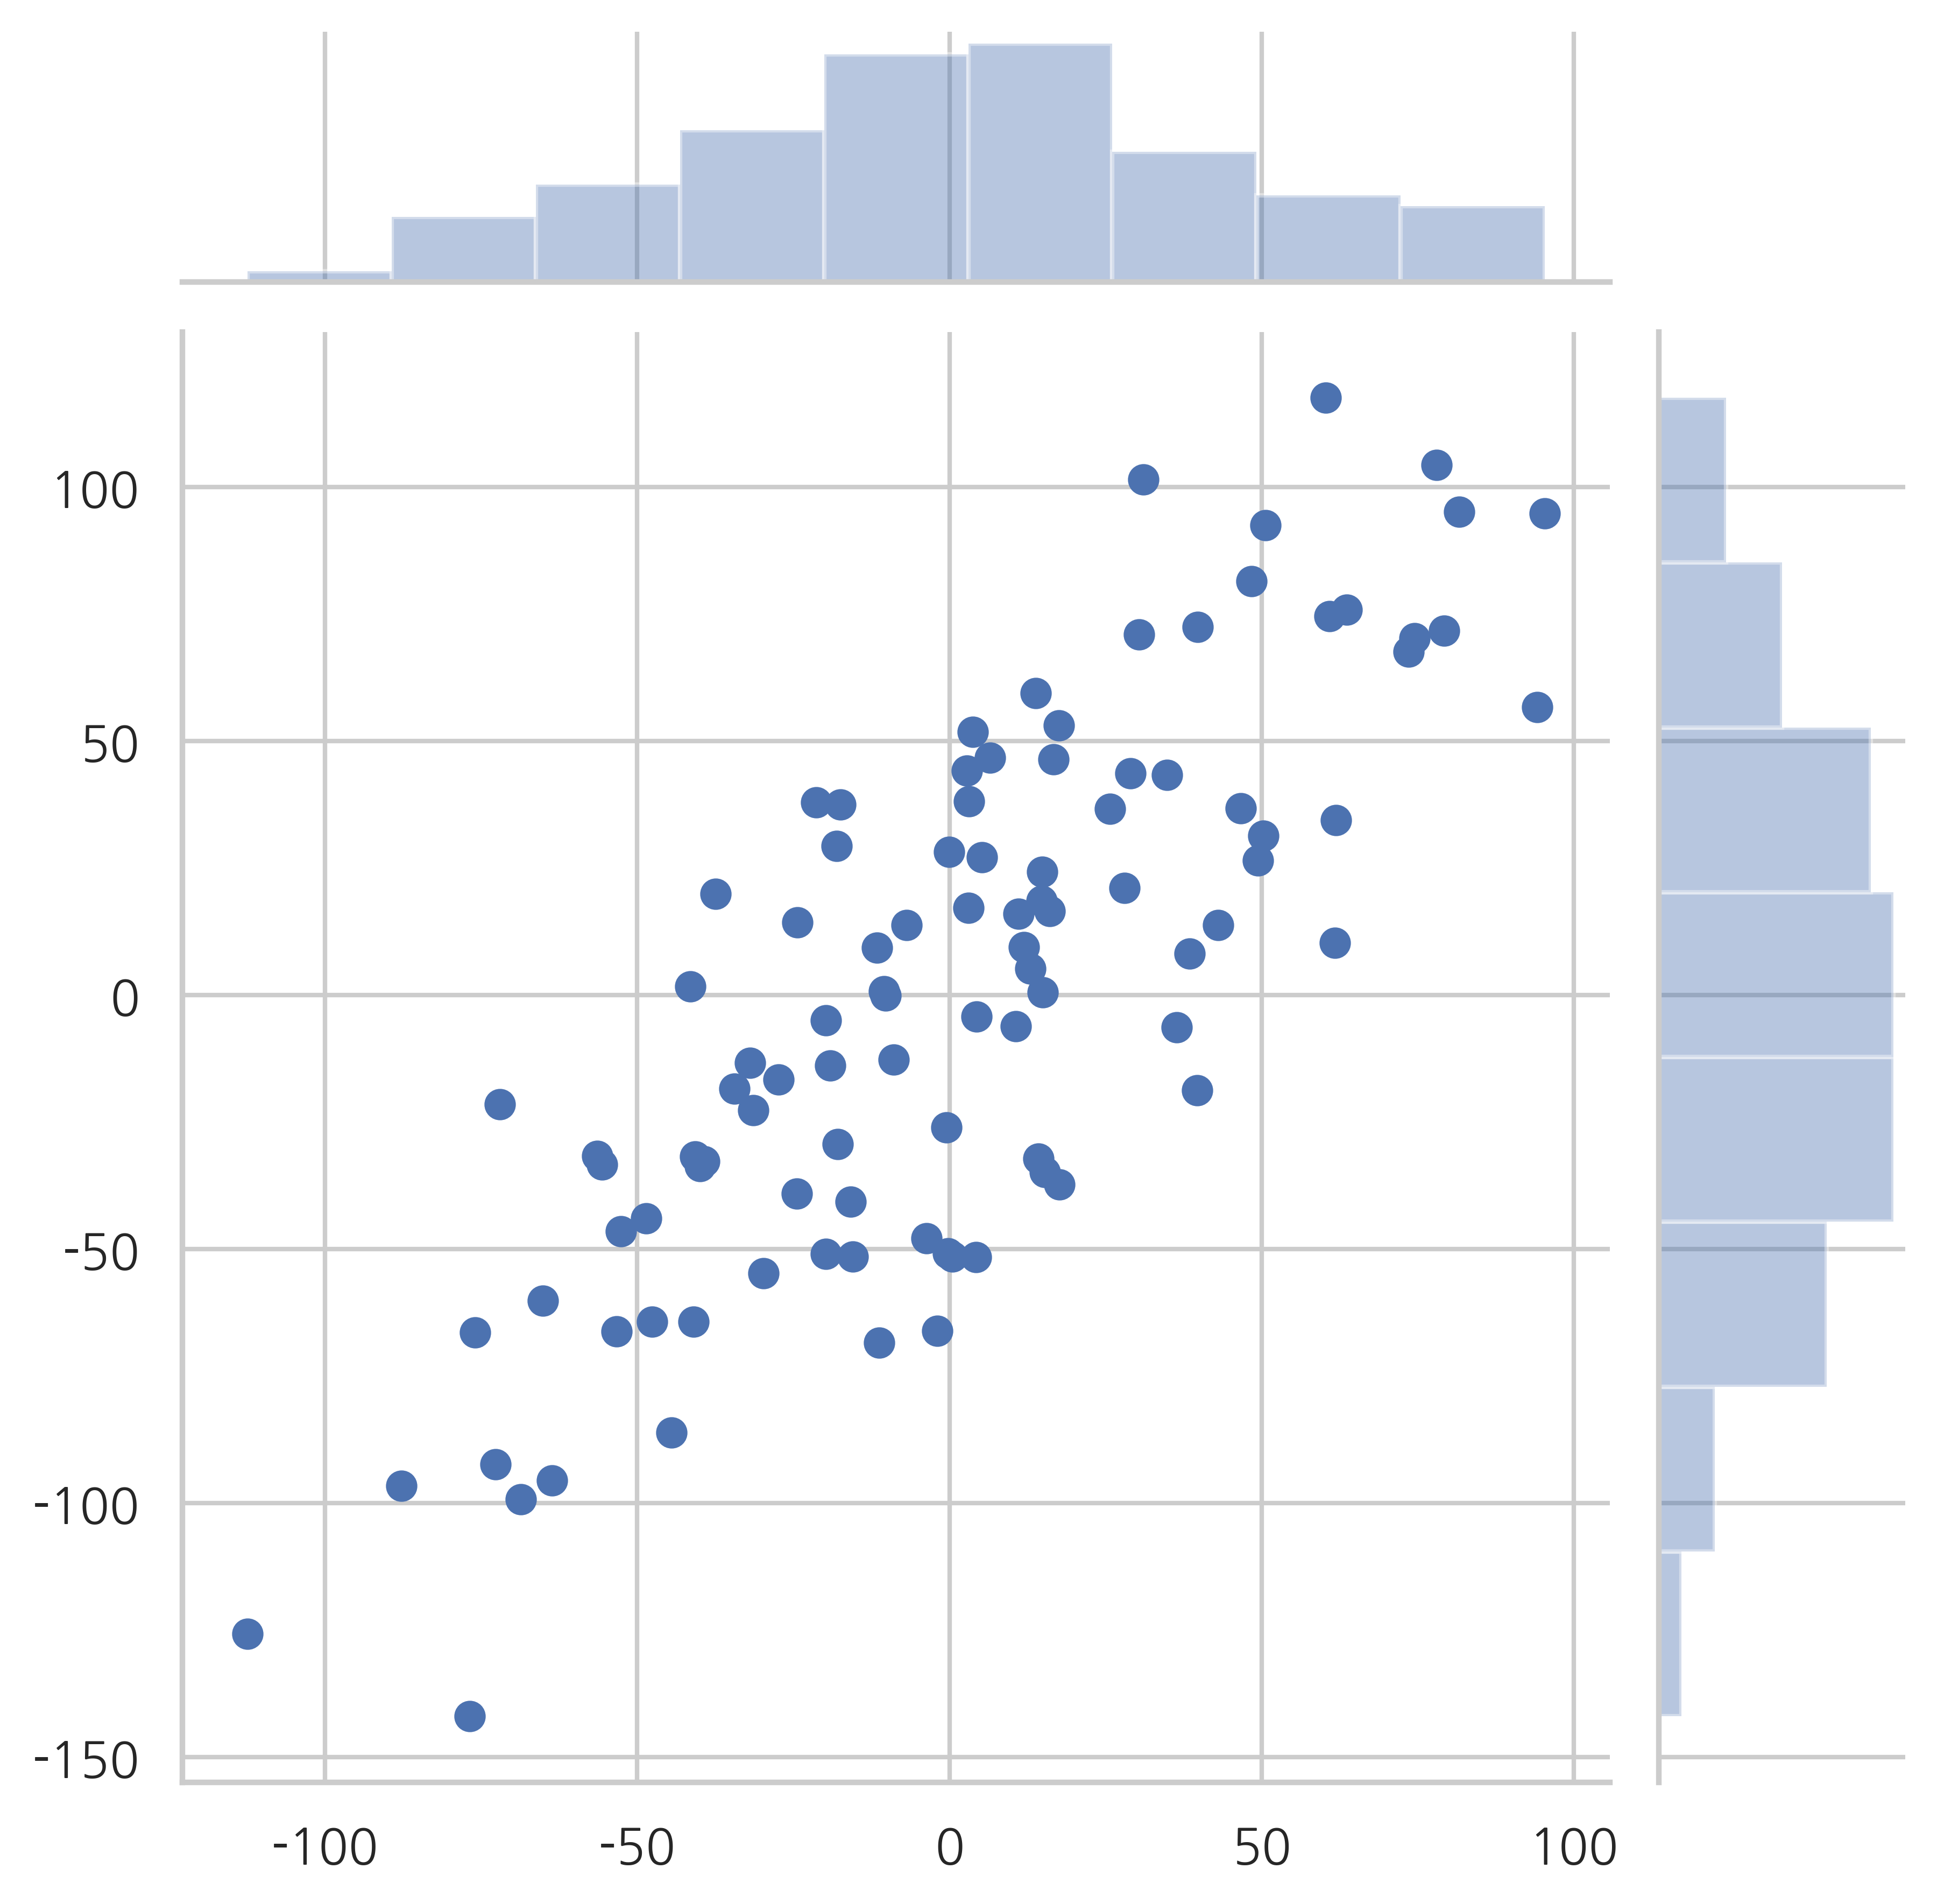

In [12]:
sns.jointplot(result.fittedvalues, y)
plt.show()

In [15]:
x0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, bias=100, coef=True, random_state=0)
dfx = pd.DataFrame(x0, columns=["x"])
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfx, dfy], axis=1)

model2 = sm.OLS.from_formula('y ~ x + 0', data=df)
result2 = model2.fit()

In [17]:
result2.rsquared

0.18768724705943896

F검정을 이용한 모형 비교

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
dfx0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=['MEDV'])
dfx_boston = sm.add_constant(dfx0_boston)
df_boston = pd.concat([dfx_boston, dfy_boston], axis=1)

In [45]:
col_f = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
col_r = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [48]:
model_full = sm.OLS.from_formula('MEDV ~ '+' + '.join(col_f), data=df_boston)
model_reduced = sm.OLS.from_formula('MEDV ~ '+' + '.join(col_r), data=df_boston)
# sm.stats.anova_lm(model_full.fit(), model_reduced.fit())
sm.stats.anova_lm(model_reduced.fit(), model_full.fit())
# 순서대로 해야하나보다

df_resid           ssr  df_diff   ss_diff         F    Pr(>F)
0     494.0  11081.363952      0.0       NaN       NaN       NaN
1     492.0  11078.784578      2.0  2.579374  0.057274  0.944342

F 검정을 사용한 변수 중요도 비교

In [53]:
col_r_crim = ['ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'CHAS']
model_full = sm.OLS.from_formula('MEDV ~ '+' + '.join(col_f), data=df_boston)
model_reduced_crim = sm.OLS.from_formula('MEDV ~ '+' + '.join(col_r_crim), data=df_boston)
sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

df_resid           ssr  df_diff   ss_diff         F    Pr(>F)
0     494.0  11081.363952      0.0       NaN       NaN       NaN
1     492.0  11078.784578      2.0  2.579374  0.057274  0.944342

In [55]:
sm.stats.anova_lm(model_full.fit(), typ=2)
# 각각의 변수를 뺀 축소모형에서의 F검정값 == 단일계수 t검정의 유의확률

sum_sq     df           F        PR(>F)
CRIM        243.219699    1.0   10.801193  1.086810e-03
ZN          257.492979    1.0   11.435058  7.781097e-04
INDUS         2.516668    1.0    0.111763  7.382881e-01
CHAS        218.970357    1.0    9.724299  1.925030e-03
NOX         487.155674    1.0   21.634196  4.245644e-06
RM         1871.324082    1.0   83.104012  1.979441e-18
AGE           0.061834    1.0    0.002746  9.582293e-01
DIS        1232.412493    1.0   54.730457  6.013491e-13
RAD         479.153926    1.0   21.278844  5.070529e-06
TAX         242.257440    1.0   10.758460  1.111637e-03
PTRATIO    1194.233533    1.0   53.034960  1.308835e-12
B           270.634230    1.0   12.018651  5.728592e-04
LSTAT      2410.838689    1.0  107.063426  7.776912e-23
Residual  11078.784578  492.0         NaN           NaN